In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [6]:
# Descriptive statistics for the numerical features

numerical_stats = df.describe()



# Distribution of attack labels

attack_label_counts = df['label'].value_counts()



numerical_stats, attack_label_counts

(       flow_duration  Header_Length  Protocol Type       Duration  \
 count  275258.000000   2.752580e+05  275258.000000  275258.000000   
 mean        6.110743   7.825272e+04       9.047155      66.372531   
 std       339.784579   4.757338e+05       8.919069      14.175824   
 min         0.000000   0.000000e+00       0.000000       0.000000   
 25%         0.000000   5.400000e+01       6.000000      64.000000   
 50%         0.000000   5.400000e+01       6.000000      64.000000   
 75%         0.104967   2.492975e+02      13.700000      64.000000   
 max     99435.761782   9.785830e+06      47.000000     255.000000   
 
                Rate         Srate         Drate  fin_flag_number  \
 count  2.752580e+05  2.752580e+05  2.752580e+05    275258.000000   
 mean   9.323696e+03  9.323696e+03  6.734263e-07         0.086508   
 std    1.027772e+05  1.027772e+05  1.428679e-04         0.281113   
 min    0.000000e+00  0.000000e+00  0.000000e+00         0.000000   
 25%    2.086761e+00  2

Descriptive Statistics

    Count: There are 275,258 entries for each numerical feature.
    Mean and Std (Standard Deviation): We can see the average values for each feature along with the spread of the data. For instance, the flow_duration has a high standard deviation relative to its mean, indicating large variations in flow duration.
    Min and Max: These values show us the range of the data for each feature. Some features have a wide range while others are more concentrated.
    25%, 50% (Median), and 75%: These percentiles give us a sense of the distribution of the data.

Attack Label Distribution

The label counts show the frequency of each type of attack in the dataset:

    The most common attack type is DDoS-ICMP_Flood with 42,340 occurrences, followed by DDoS-UDP_Flood.
    The least common are web-based attacks like SqlInjection, CommandInjection, XSS, and Backdoor_Malware, which have very few occurrences in this particular CSV file.
    There is also benign traffic labeled as BenignTraffic, which is important for training classification models to distinguish between normal and malicious traffic.

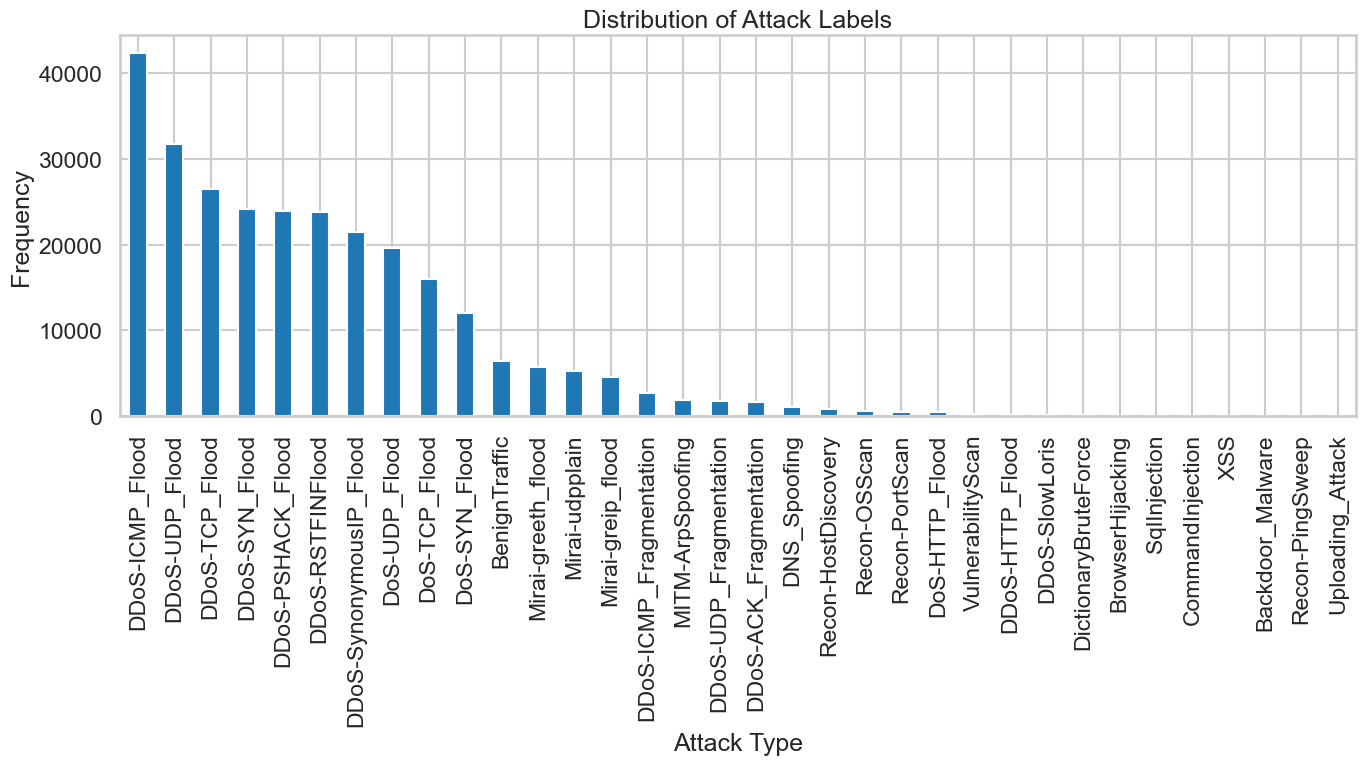

In [7]:


# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Bar chart for the distribution of attack labels
plt.figure(figsize=(14, 8))
attack_label_counts.plot(kind='bar')
plt.title('Distribution of Attack Labels')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate the x labels to show them clearly
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

# Show the plot
plt.show()


The bar chart above visualizes the frequency of each attack type in the dataset. As we can see, some attack types like DDoS-ICMP_Flood, DDoS-UDP_Flood, and others in the DDoS category are much more frequent than others.

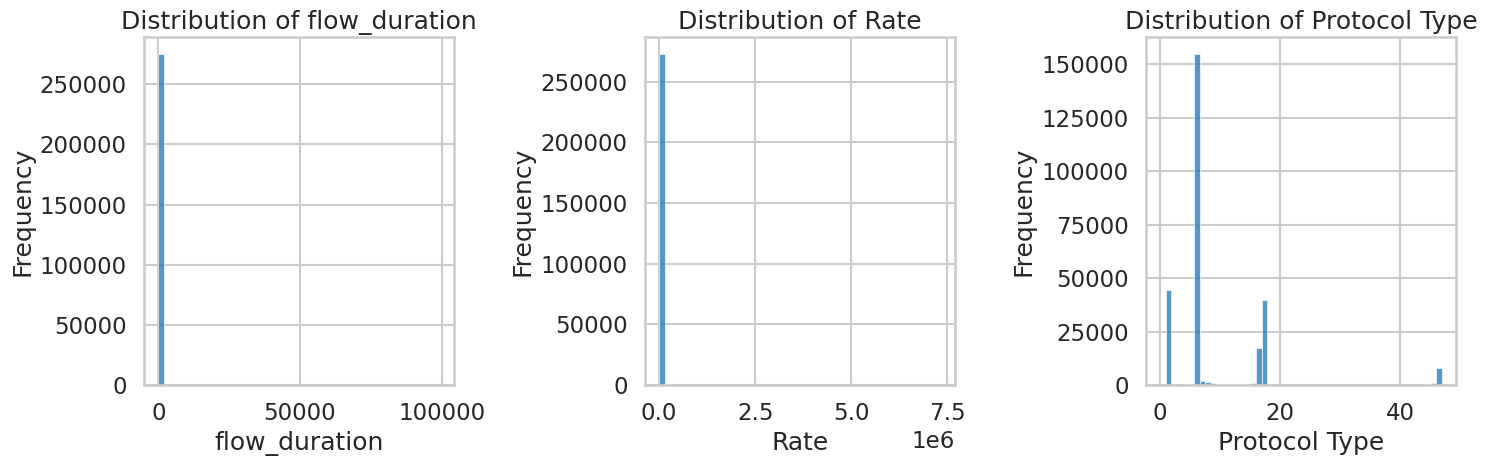

In [5]:
# Selecting a few numerical features for histograms
features_to_plot = ['flow_duration', 'Rate', 'Protocol Type']

# Plot histograms for the selected features
plt.figure(figsize=(15, 5))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], bins=50, kde=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The histograms for flow_duration, Rate, and Protocol Type show the following:

    flow_duration: Most of the flow durations are concentrated at the lower end, near zero, suggesting that many flows are very short-lived, which is characteristic of some types of attacks that generate a lot of quick traffic.
    Rate: This feature also shows a heavy concentration near zero, indicating that many flows have low rates, with a few exceptions going up to higher values.
    Protocol Type: The distribution is a bit more spread out, but there is a clear concentration around certain protocol numbers, likely corresponding to common protocols like TCP and UDP.

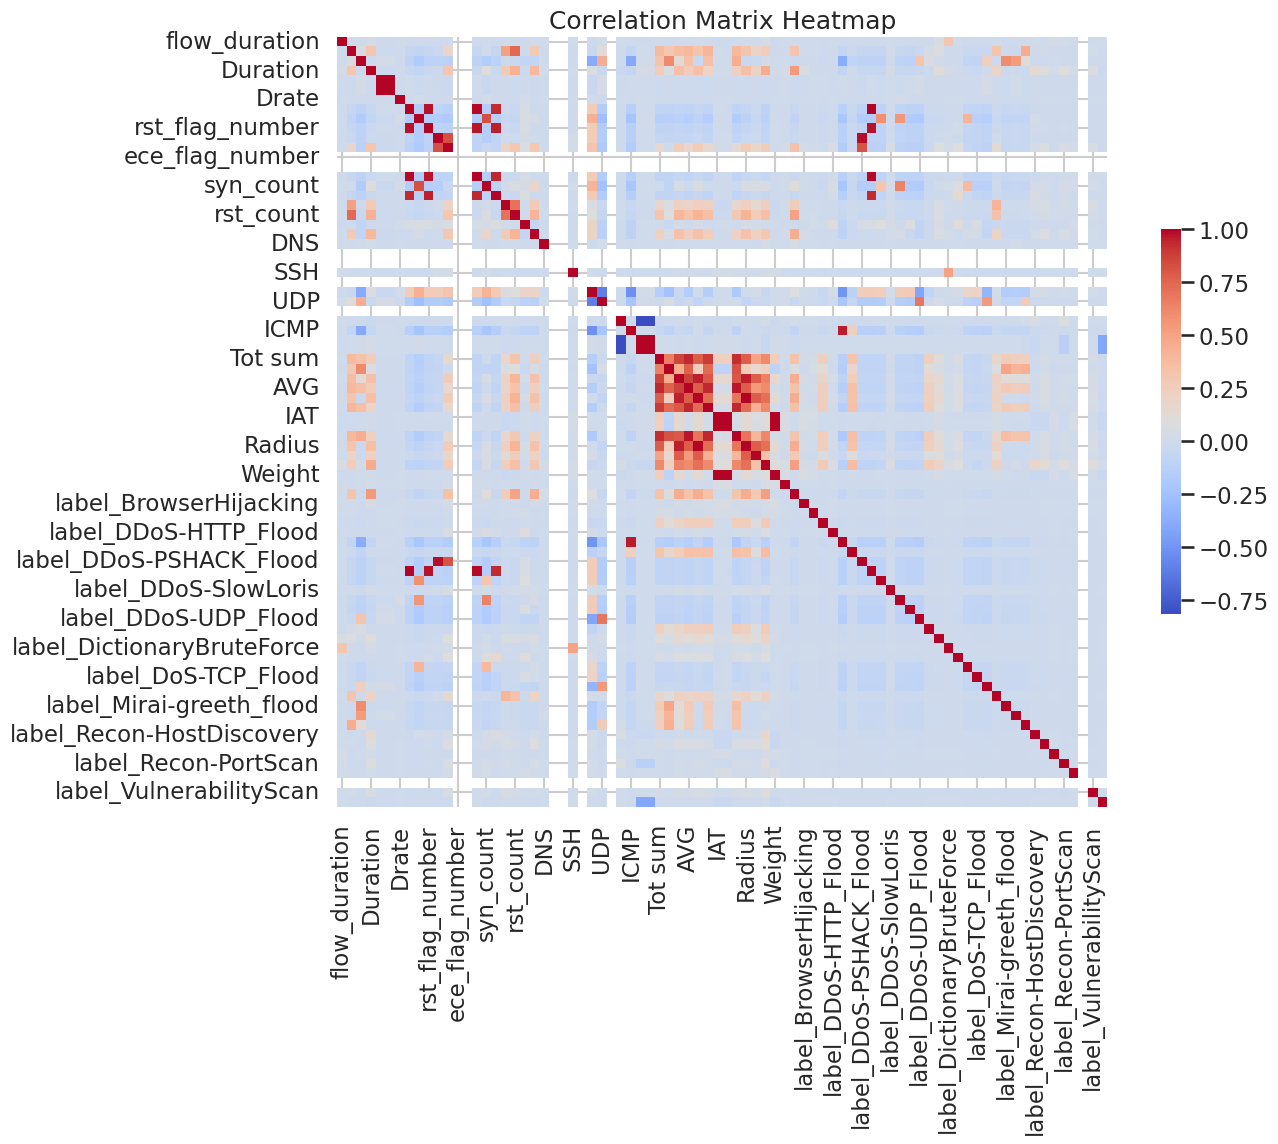

In [6]:
# Identify categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply one hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Sample a fraction of the data to avoid memory issues
df_sampled = df_encoded.sample(frac=0.1, random_state=1)

# Calculate the correlation matrix
corr_subset = df_sampled.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_subset, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap')
plt.show()


The heatmap above displays the correlation matrix for a subset of the data, which provides a visual representation of the correlation coefficients between pairs of features. In such a large dataset with many features, correlations can reveal:

    Strong positive or negative relationships: Highly correlated features can sometimes be redundant, and one of the pair might be excluded to simplify the model.
    Lack of relationship: Features that have low correlation with others might be unique contributors to the model or may not contribute at all.

For features that are strongly correlated with the attack labels, those would be considered important for detecting and classifying attacks.

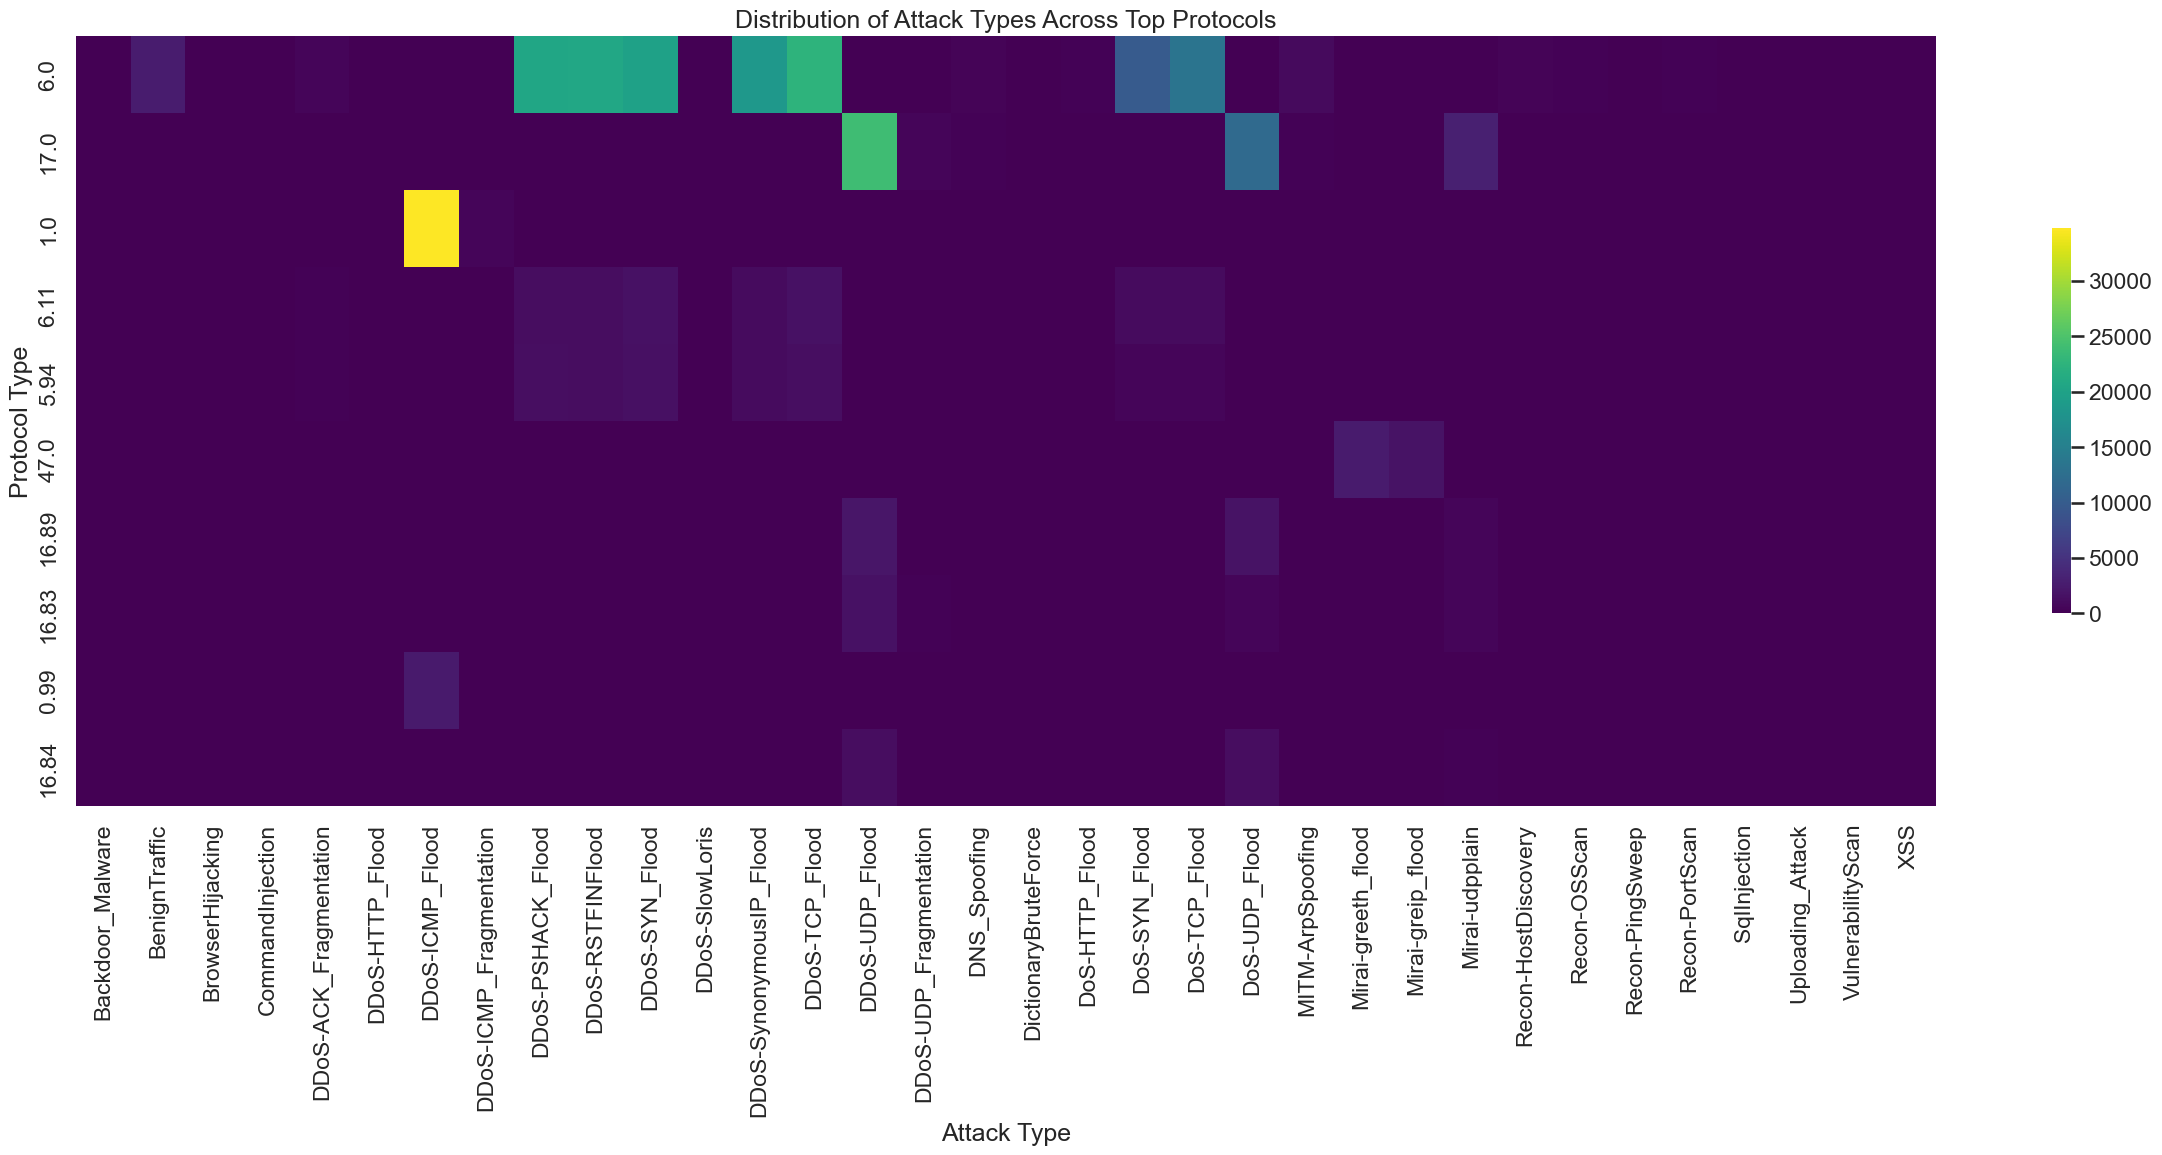

In [11]:
# Protocol-based analysis: Let's see the distribution of attack types across different protocol types
# We'll group the data by 'Protocol Type' and see the count of each attack label within each protocol

# Grouping the data
protocol_attack_distribution = df.groupby('Protocol Type')['label'].value_counts().unstack(fill_value=0)

# Because there might be a large number of protocols, let's visualize the distribution for the top protocols only
top_protocols = df['Protocol Type'].value_counts().head(10).index
protocol_attack_distribution_top = protocol_attack_distribution.loc[top_protocols]

# Plotting the distribution
plt.figure(figsize=(30, 10))
sns.heatmap(protocol_attack_distribution_top, fmt="d", cmap='viridis', cbar_kws={"shrink": .5})
plt.title('Distribution of Attack Types Across Top Protocols')
plt.xlabel('Attack Type')
plt.ylabel('Protocol Type')
plt.show()


In [12]:
# Count the frequency of each attack type
attack_counts = df['label'].value_counts()
print(attack_counts)


label
DDoS-ICMP_Flood            42340
DDoS-UDP_Flood             31743
DDoS-TCP_Flood             26517
DDoS-SYN_Flood             24163
DDoS-PSHACK_Flood          23890
DDoS-RSTFINFlood           23823
DDoS-SynonymousIP_Flood    21441
DoS-UDP_Flood              19602
DoS-TCP_Flood              15938
DoS-SYN_Flood              12006
BenignTraffic               6387
Mirai-greeth_flood          5703
Mirai-udpplain              5244
Mirai-greip_flood           4509
DDoS-ICMP_Fragmentation     2685
MITM-ArpSpoofing            1835
DDoS-UDP_Fragmentation      1692
DDoS-ACK_Fragmentation      1635
DNS_Spoofing                1070
Recon-HostDiscovery          816
Recon-OSScan                 575
Recon-PortScan               482
DoS-HTTP_Flood               454
VulnerabilityScan            207
DDoS-HTTP_Flood              146
DDoS-SlowLoris               131
DictionaryBruteForce          92
BrowserHijacking              37
SqlInjection                  29
CommandInjection              25
XSS 

In [9]:
df.columns.tolist()

['flow_duration',
 'Header_Length',
 'Protocol Type',
 'Duration',
 'Rate',
 'Srate',
 'Drate',
 'fin_flag_number',
 'syn_flag_number',
 'rst_flag_number',
 'psh_flag_number',
 'ack_flag_number',
 'ece_flag_number',
 'cwr_flag_number',
 'ack_count',
 'syn_count',
 'fin_count',
 'urg_count',
 'rst_count',
 'HTTP',
 'HTTPS',
 'DNS',
 'Telnet',
 'SMTP',
 'SSH',
 'IRC',
 'TCP',
 'UDP',
 'DHCP',
 'ARP',
 'ICMP',
 'IPv',
 'LLC',
 'Tot sum',
 'Min',
 'Max',
 'AVG',
 'Std',
 'Tot size',
 'IAT',
 'Number',
 'Magnitue',
 'Radius',
 'Covariance',
 'Variance',
 'Weight',
 'label']

c:\Users\naray\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


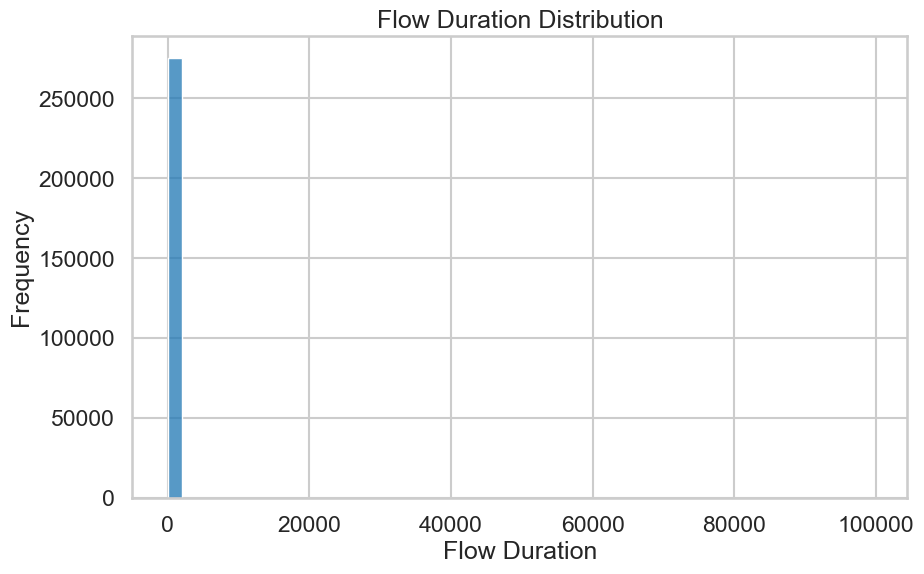

In [13]:
# Analysis 1: Traffic Pattern and Behavior Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['flow_duration'], bins=50, kde=False)
plt.title('Flow Duration Distribution')
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.show()

In [16]:
df["Number"].value_counts()

Number
9.500000     263581
13.500000      5711
5.500000       5673
10.000000         8
9.333333          7
              ...  
15.000000         1
9.044944          1
2.000000          1
9.241935          1
9.412371          1
Name: count, Length: 88, dtype: int64

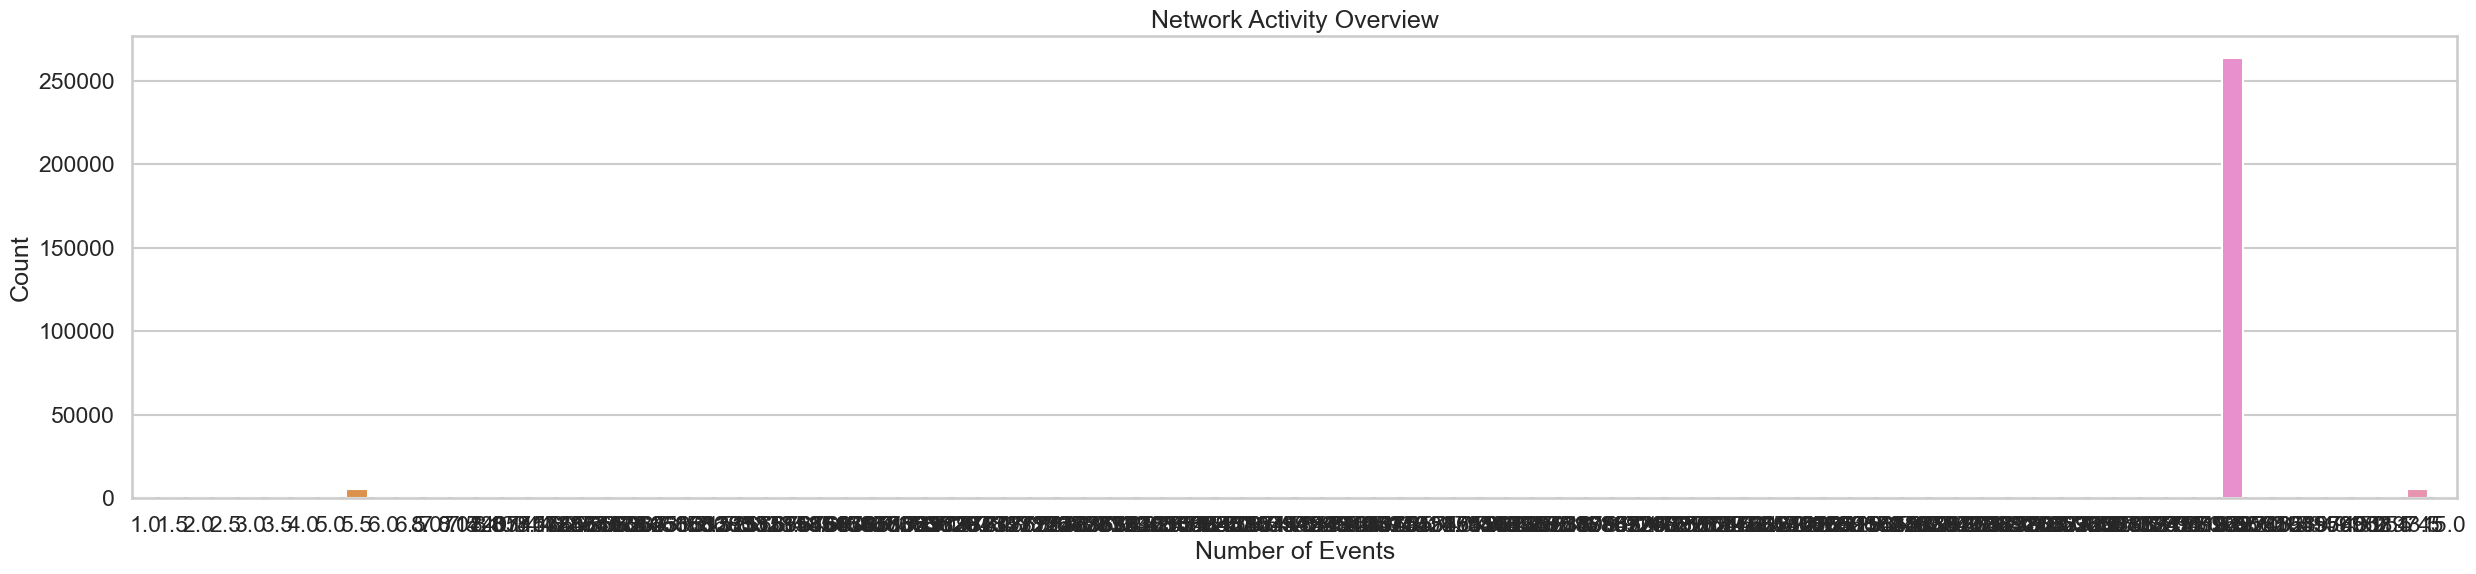

In [14]:
# Analysis 2: Network Activity Overview
plt.figure(figsize=(30, 6))
sns.countplot(x='Number', data=df)
plt.title('Network Activity Overview')
plt.xlabel('Number of Events')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


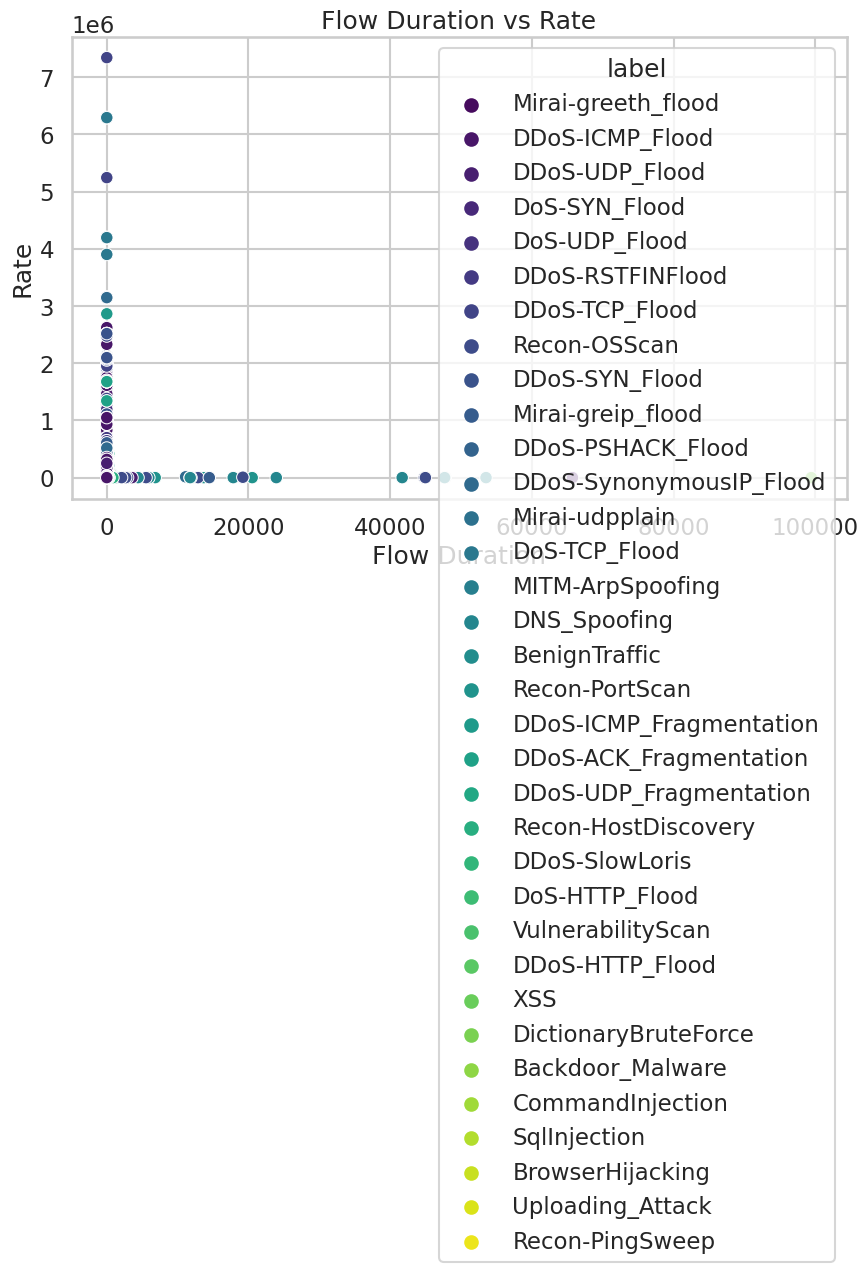

In [12]:
# Analysis 3: Relationship and Dependency Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='flow_duration', y='Rate', hue='label', data=df, palette='viridis')
plt.title('Flow Duration vs Rate')
plt.xlabel('Flow Duration')
plt.ylabel('Rate')
plt.show()

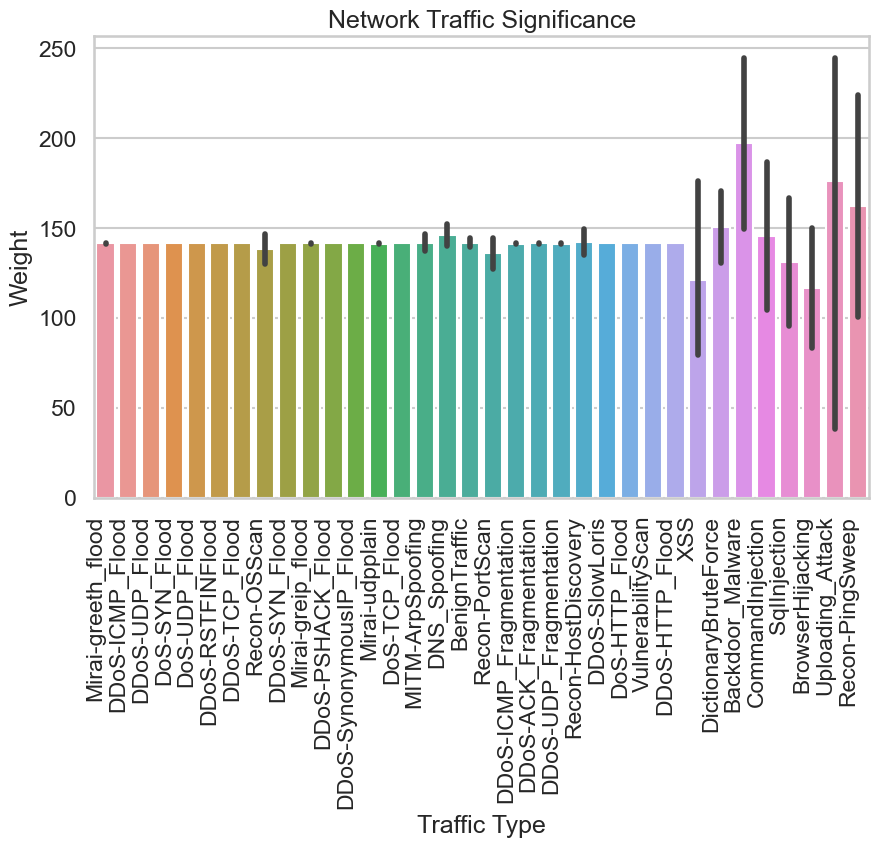

In [19]:
# Analysis 4: Network Traffic Significance
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='Weight', data=df)
plt.title('Network Traffic Significance')
plt.xlabel('Traffic Type')
plt.ylabel('Weight')
plt.xticks(rotation=90, ha='right')
plt.show()

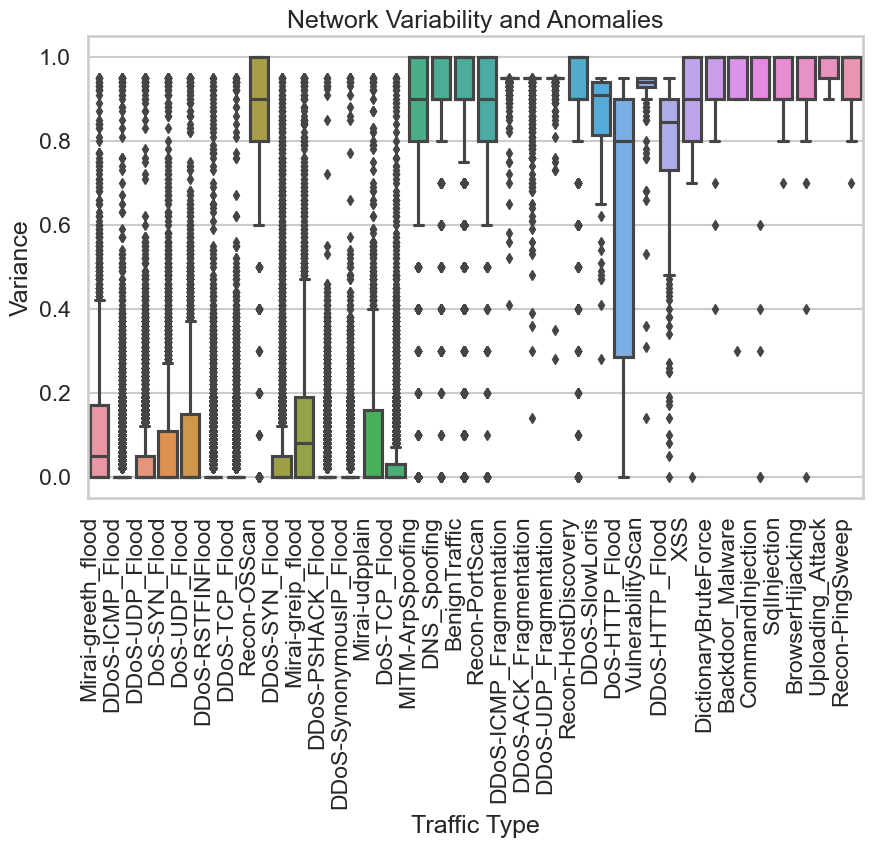

In [20]:
# Analysis 5: Network Variability and Anomalies
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='Variance', data=df)
plt.title('Network Variability and Anomalies')
plt.xlabel('Traffic Type')
plt.ylabel('Variance')
plt.xticks(rotation=90, ha='right')
plt.show()

In [ ]:
print(df_corr["label"].sort_values(ascending=False, key=abs).to_markdown())

|                 |        label |
|:----------------|-------------:|
| label           |  1           |
| Protocol Type   |  0.45861     |
| Min             |  0.405704    |
| Magnitue        |  0.301441    |
| AVG             |  0.226213    |
| Tot size        |  0.225437    |
| Tot sum         |  0.222546    |
| UDP             |  0.170722    |
| ICMP            | -0.16666     |
| TCP             | -0.166117    |
| Header_Length   |  0.162468    |
| ack_flag_number | -0.126027    |
| fin_flag_number | -0.116865    |
| ack_count       | -0.110791    |
| psh_flag_number | -0.104059    |
| rst_flag_number | -0.103016    |
| urg_count       |  0.0920605   |
| HTTPS           | -0.0831803   |
| fin_count       | -0.0755288   |
| syn_count       | -0.0637364   |
| Max             |  0.0589227   |
| syn_flag_number | -0.0528001   |
| Variance        |  0.04683     |
| flow_duration   |  0.0457839   |
| Duration        | -0.0445295   |
| Std             | -0.0440355   |
| Radius          | 

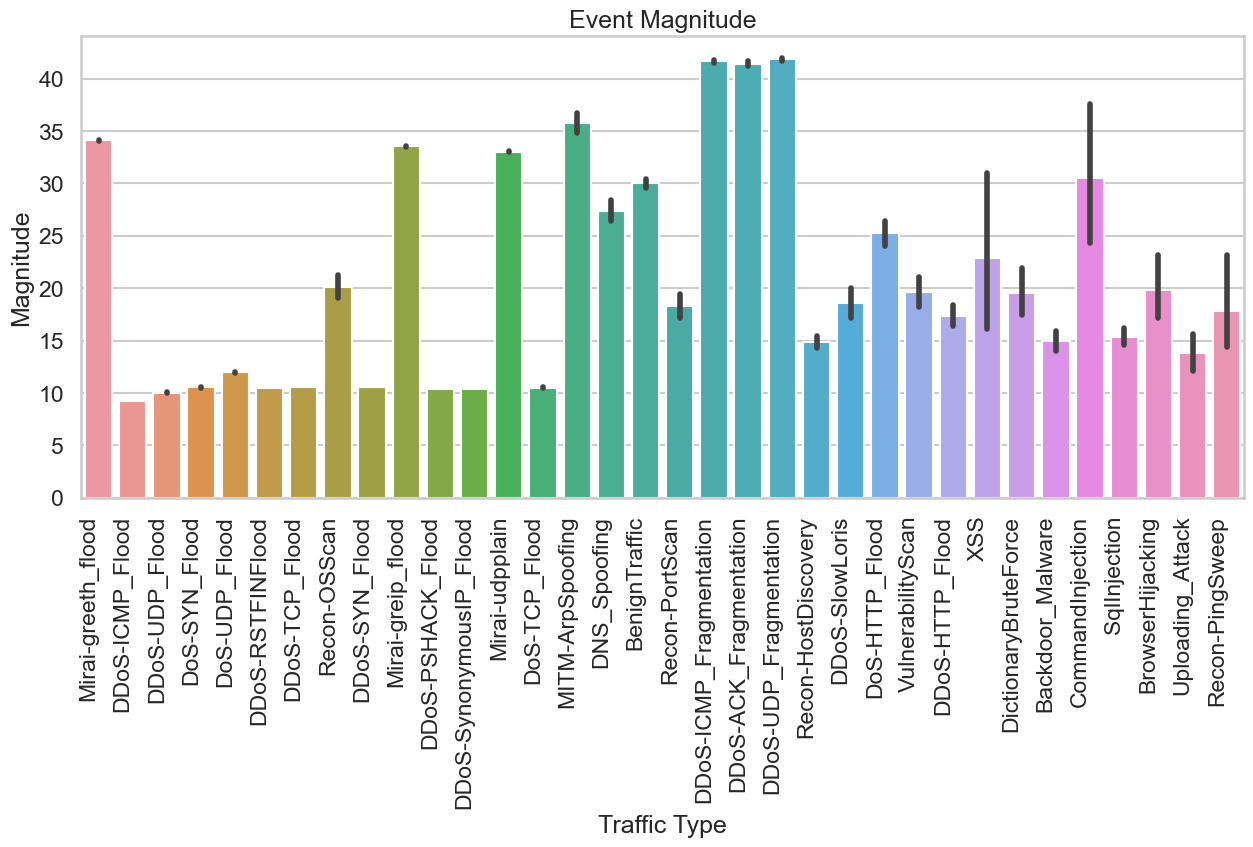

In [18]:

# Analysis 6: Event Magnitude
plt.figure(figsize=(15, 6))
sns.barplot(x='label', y='Magnitue', data=df)
plt.title('Event Magnitude')
plt.xlabel('Traffic Type')
plt.ylabel('Magnitude')
plt.xticks(rotation=90, ha='right')
plt.show()

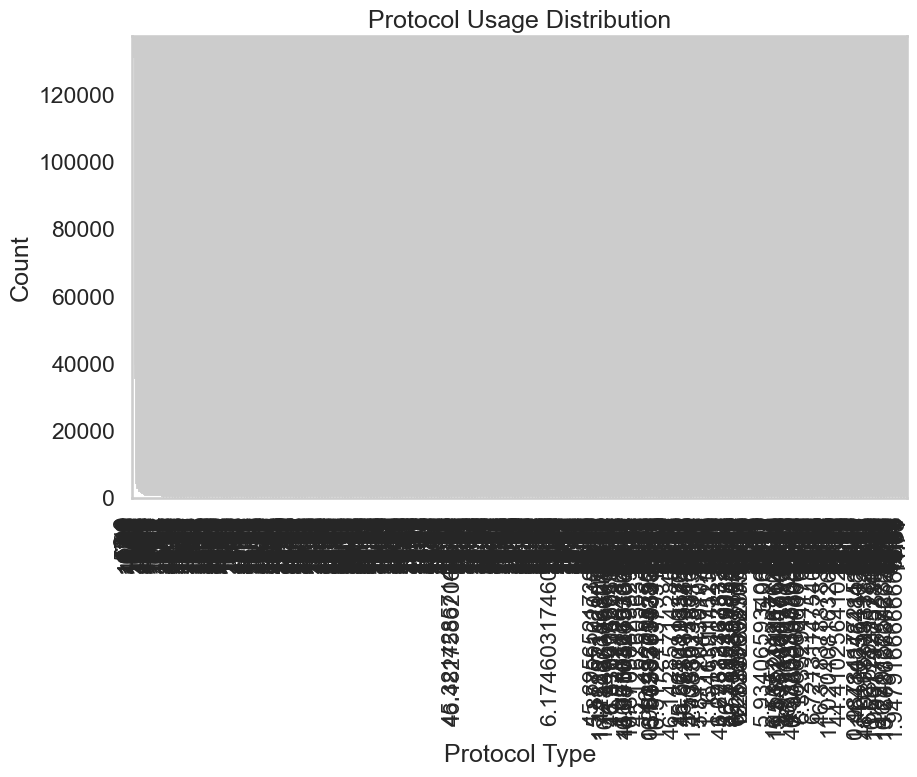

In [21]:
# Analysis 8: Protocol Usage Analysis
protocol_counts = df['Protocol Type'].value_counts()
plt.figure(figsize=(10, 6))
protocol_counts.plot(kind='bar')
plt.title('Protocol Usage Distribution')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

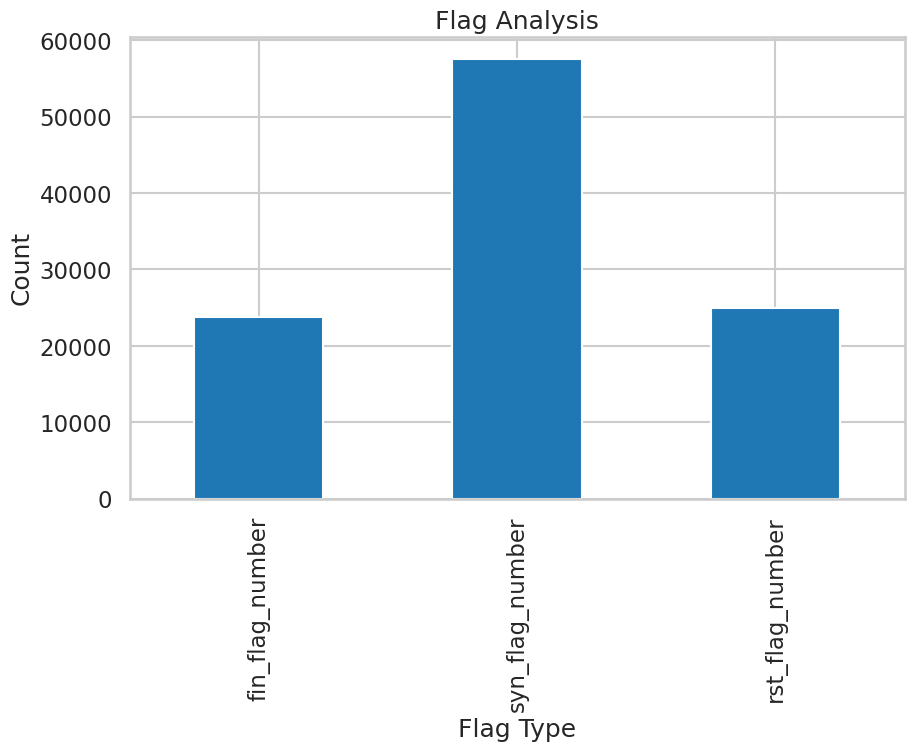

In [17]:
# Analysis 9: Flag Analysis
flags = ['fin_flag_number', 'syn_flag_number', 'rst_flag_number']
df_flags = df[flags].sum()
plt.figure(figsize=(10, 6))
df_flags.plot(kind='bar')
plt.title('Flag Analysis')
plt.xlabel('Flag Type')
plt.ylabel('Count')
plt.show()

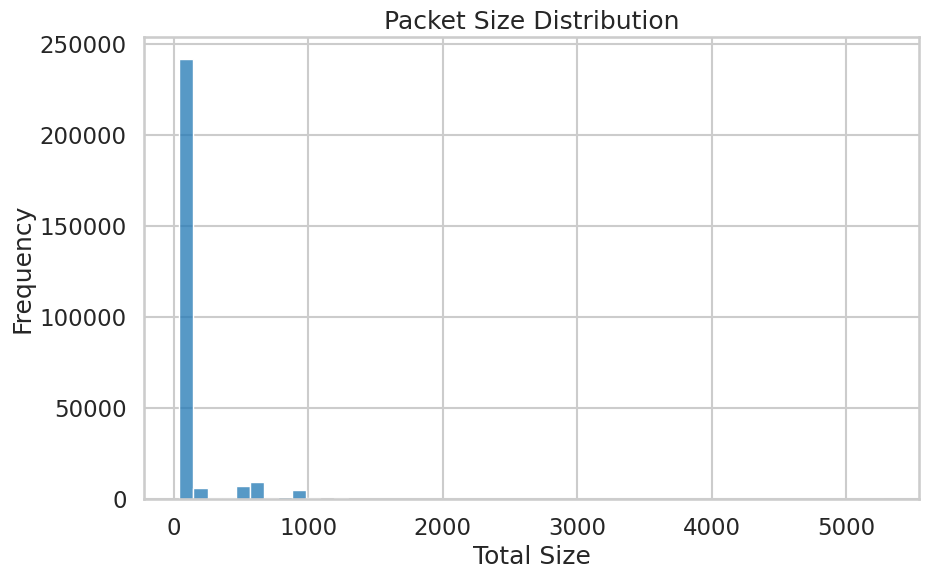

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Tot size'], bins=50, kde=False)
plt.title('Packet Size Distribution')
plt.xlabel('Total Size')
plt.ylabel('Frequency')
plt.show()

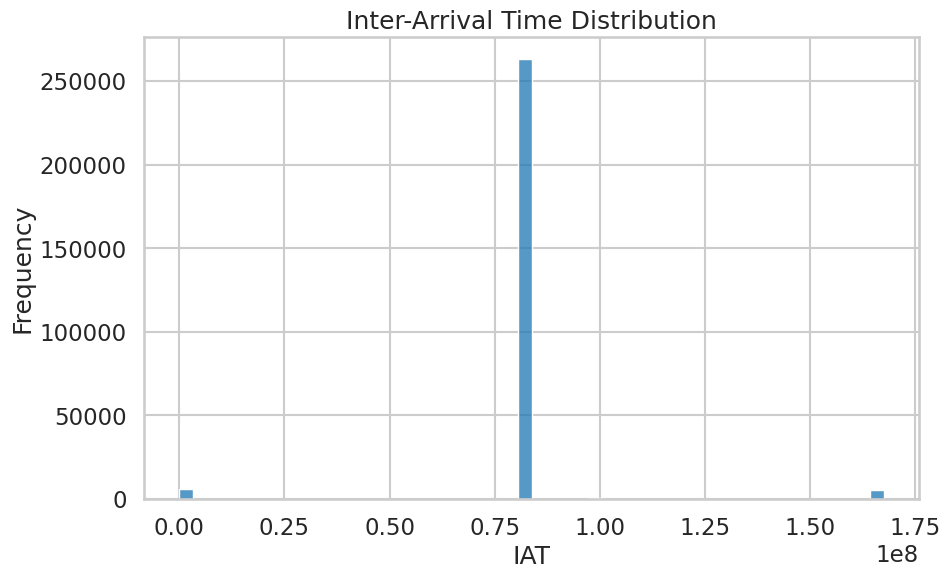

In [19]:
# Additional Analysis: IAT Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['IAT'], bins=50, kde=False)
plt.title('Inter-Arrival Time Distribution')
plt.xlabel('IAT')
plt.ylabel('Frequency')
plt.show()

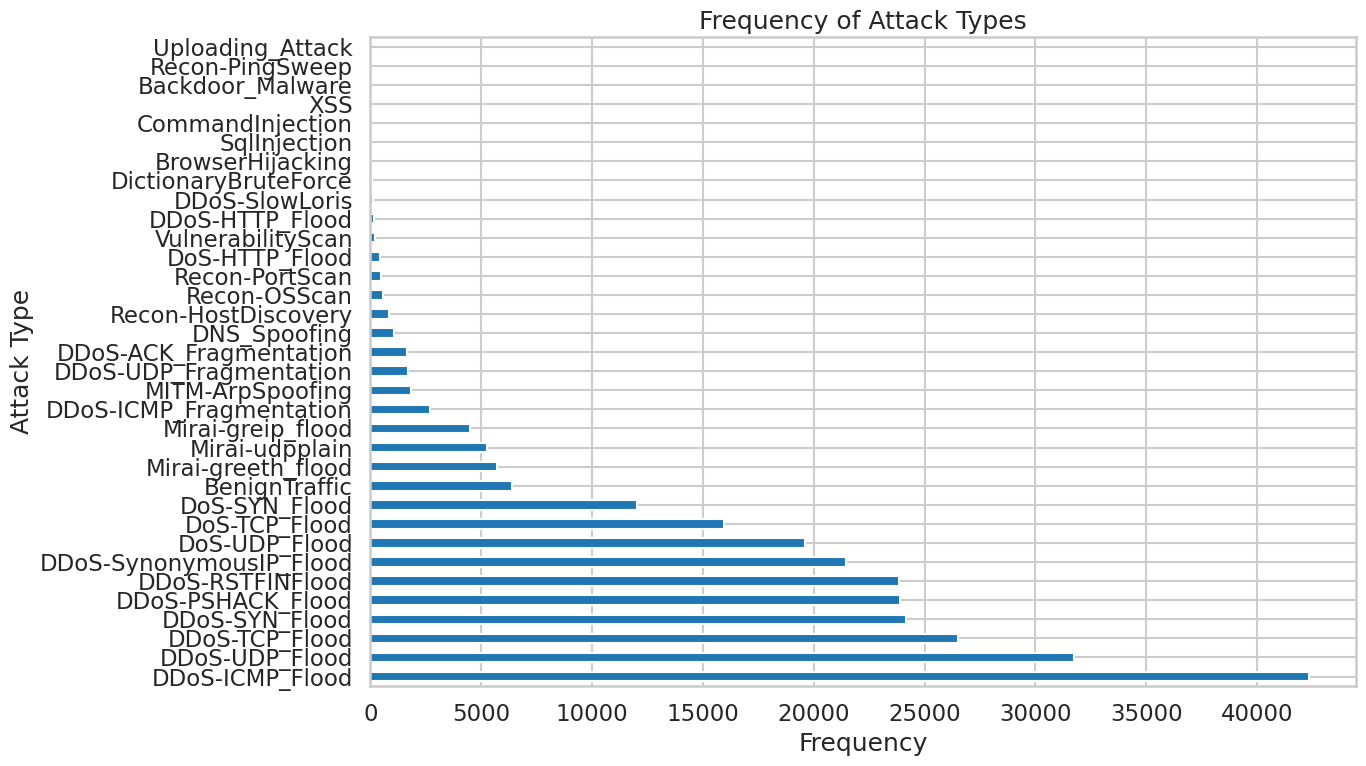

In [20]:
# Frequency of each attack type
# attack_counts = df['label'].value_counts()

# plt.figure(figsize=(12, 8))
# attack_counts.plot(kind='bar')
# plt.title('Frequency of Attack Types')
# plt.xlabel('Attack Type')
# plt.ylabel('Frequency')
# plt.show()
plt.figure(figsize=(14, 8))
attack_counts = df['label'].value_counts()
attack_counts.plot(kind='barh')  # Horizontal bar chart for readability
plt.title('Frequency of Attack Types')
plt.xlabel('Frequency')
plt.ylabel('Attack Type')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

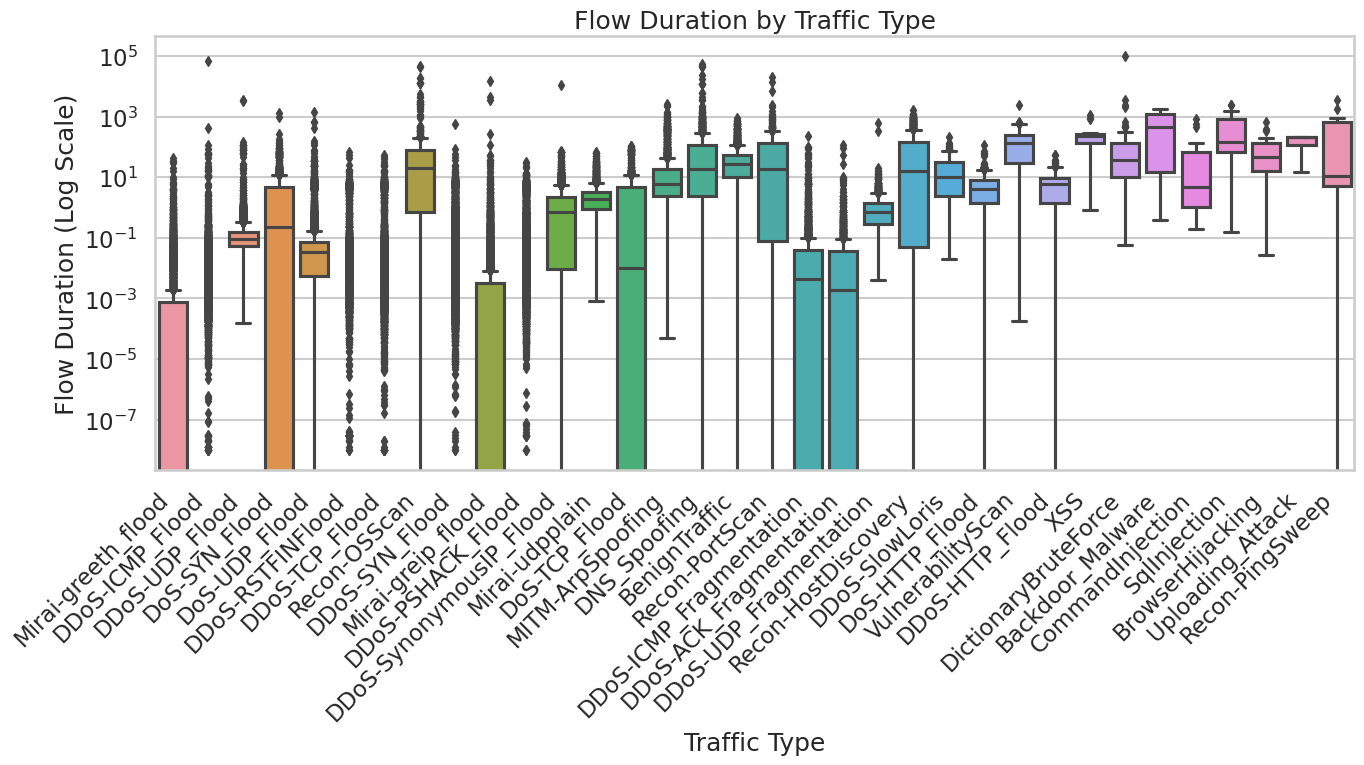

In [21]:
# Detecting patterns and anomalies in traffic flow and duration
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=df, x='label', y='flow_duration')
# plt.title('Flow Duration by Traffic Type')
# plt.xlabel('Traffic Type')
# plt.ylabel('Flow Duration')
# plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='label', y='flow_duration')
plt.title('Flow Duration by Traffic Type')
plt.xlabel('Traffic Type')
plt.ylabel('Flow Duration (Log Scale)')
plt.yscale('log')  # Log scale to handle wide range of values
plt.xticks(rotation=90, ha='right')  # Rotate x labels for readability
plt.tight_layout()
plt.show()

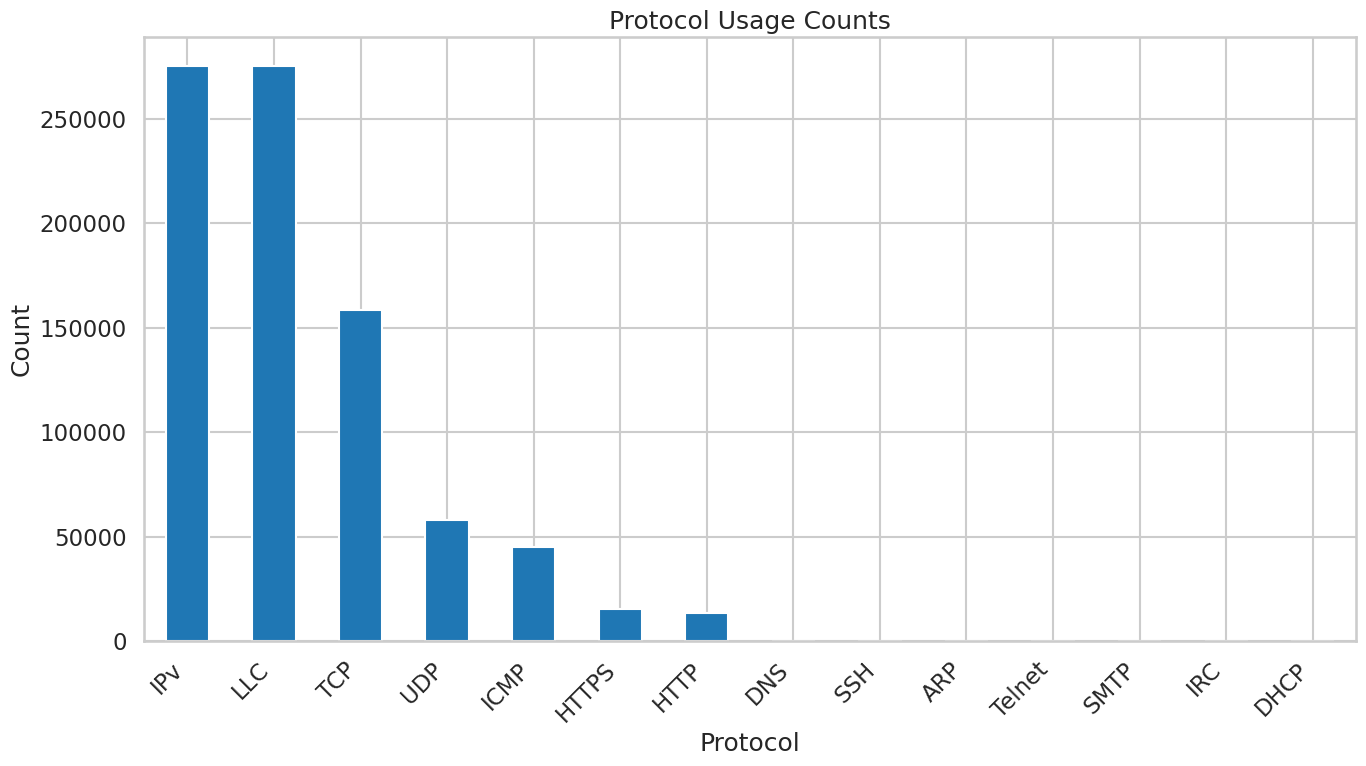

In [22]:
# Detecting anomalies in protocol usage
# plt.figure(figsize=(12, 8))
# sns.countplot(data=df, x='Protocol Type', hue='label')
# plt.title('Protocol Usage by Traffic Type')
# plt.xlabel('Protocol Type')
# plt.ylabel('Count')
# plt.legend(title='Traffic Type')
# plt.show()
#plt.figure(figsize=(14, 8))
# protocol_usage = df.groupby('label')['Protocol Type'].value_counts().unstack().fillna(0)
# protocol_usage.plot(kind='bar', stacked=True)  # Stacked bar chart for protocol usage
# plt.title('Protocol Usage by Traffic Type')
# plt.xlabel('Traffic Type')
# plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='Protocol Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend out of the plot
# plt.tight_layout()
# plt.show()
# plt.figure(figsize=(14, 10))  # Increased figure size
# protocol_counts = df['Protocol Type'].value_counts().nlargest(10)  # Only take the top 10 protocols
# protocol_counts.plot(kind='bar')
# plt.title('Top 10 Protocol Usage by Traffic Type')
# plt.xlabel('Protocol Type')
# plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better fit
# plt.tight_layout()  # Adjust layout
# plt.show()
# Sum the protocol columns to get the total count for each protocol
protocols = ['HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC']
protocol_counts = df[protocols].sum().sort_values(ascending=False)

# Now let's plot the protocol usage
plt.figure(figsize=(14, 8))
protocol_counts.plot(kind='bar')
plt.title('Protocol Usage Counts')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better fit
plt.tight_layout()  # Adjust layout
plt.show()

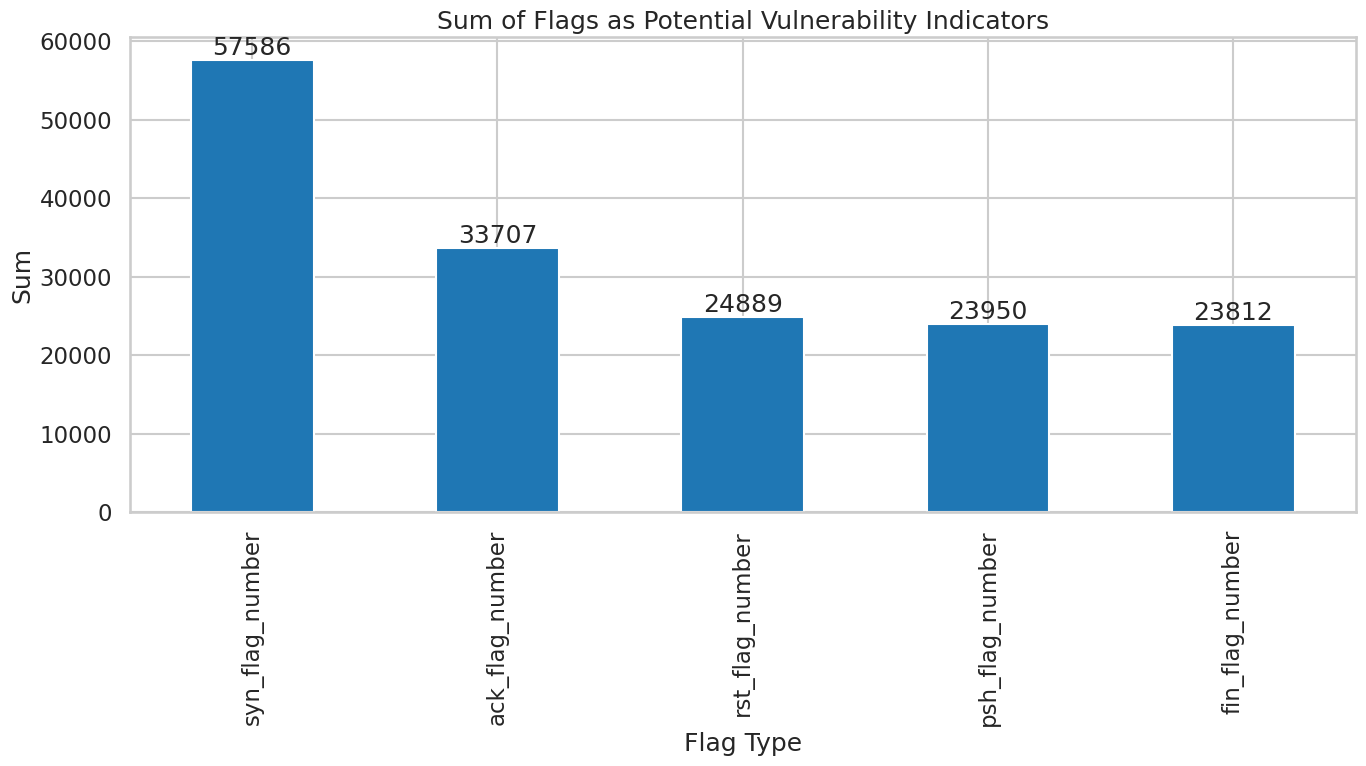

In [23]:
# Analyzing flag anomalies that may indicate network vulnerabilities
# flags = ['fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number']
# df_flags = df[flags].sum()

# plt.figure(figsize=(12, 8))
# df_flags.plot(kind='bar')
# plt.title('Sum of Flags as Potential Vulnerability Indicators')
# plt.xlabel('Flag Type')
# plt.ylabel('Sum')
# plt.show()
plt.figure(figsize=(14, 8))
flags = ['fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number']
df_flags = df[flags].sum().sort_values(ascending=False)
df_flags.plot(kind='bar')
plt.title('Sum of Flags as Potential Vulnerability Indicators')
plt.xlabel('Flag Type')
plt.ylabel('Sum')
for index, value in enumerate(df_flags):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom')  # Add text labels on bars
plt.tight_layout()
plt.show()

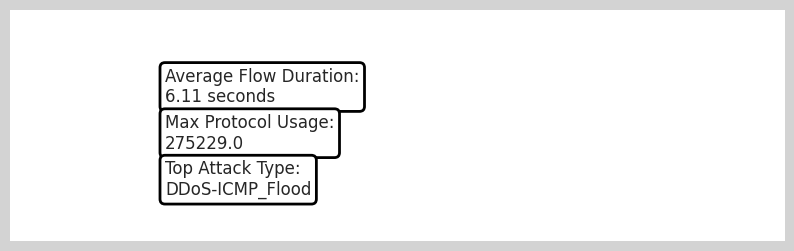

In [24]:
import matplotlib.pyplot as plt

# Calculate some key metrics
average_flow_duration = df['flow_duration'].mean()
max_protocol_usage = df[protocols].sum().max()
top_attack_type = df['label'].value_counts().idxmax()

# Create a figure for the scorecard
fig, ax = plt.subplots(figsize=(10, 3))

# Hide the axes
ax.axis('off')

# Set background color
fig.patch.set_facecolor('lightgray')
ax.set_facecolor('lightgray')

# Draw a rectangle as the scorecard background
rect = plt.Rectangle((0.1, 0.1), width=0.8, height=0.8, transform=fig.transFigure, 
                     facecolor='white', zorder=0)
ax.add_patch(rect)

# Display key metrics
bbox_props = dict(boxstyle="round,pad=0.3", ec="black", lw=2, facecolor="white")
ax.text(0.2, 0.6, f'Average Flow Duration:\n{average_flow_duration:.2f} seconds', 
        fontsize=12, bbox=bbox_props)
ax.text(0.2, 0.4, f'Max Protocol Usage:\n{max_protocol_usage}', 
        fontsize=12, bbox=bbox_props)
ax.text(0.2, 0.2, f'Top Attack Type:\n{top_attack_type}', 
        fontsize=12, bbox=bbox_props)

# Show the scorecard
plt.show()


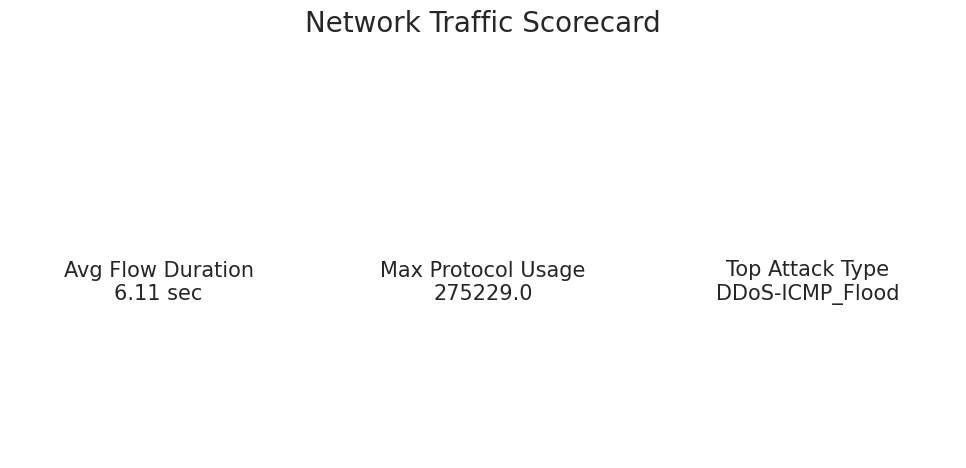

In [25]:
import matplotlib.pyplot as plt

# Example metrics for the scorecard
average_flow_duration = df['flow_duration'].mean()
max_protocol_usage = df[protocols].sum().max()
top_attack_type = df['label'].value_counts().idxmax()

# Create the figure
plt.figure(figsize=(10, 5))
plt.suptitle('Network Traffic Scorecard', fontsize=20)

# Scorecard for Average Flow Duration
plt.subplot(1, 3, 1)
plt.text(0.5, 0.5, f'Avg Flow Duration\n{average_flow_duration:.2f} sec', fontsize=15, 
         ha='center', va='center')
plt.gca().set_axis_off()

# Scorecard for Max Protocol Usage
plt.subplot(1, 3, 2)
plt.text(0.5, 0.5, f'Max Protocol Usage\n{max_protocol_usage}', fontsize=15, 
         ha='center', va='center')
plt.gca().set_axis_off()

# Scorecard for Top Attack Type
plt.subplot(1, 3, 3)
plt.text(0.5, 0.5, f'Top Attack Type\n{top_attack_type}', fontsize=15, 
         ha='center', va='center')
plt.gca().set_axis_off()

# Adjust the layout and display
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [26]:
# Print a sample of values from the 'Protocol Type' column
print(df['Protocol Type'].sample(10))


253929    46.29
96043      6.00
168333     1.00
115030    17.00
90749     46.10
236080     1.00
76250      1.00
64343      6.00
264120     6.00
141382     6.00
Name: Protocol Type, dtype: float64


In [27]:
protocol_http_crosstab = pd.crosstab(df['Protocol Type'], df['HTTP'])

print(protocol_http_crosstab)

HTTP            0.0  1.0
Protocol Type           
0.000000          1    0
0.500000          1    0
0.600000          2    0
0.680000          2    0
0.860000          1    0
...             ...  ...
46.589041         1    0
46.590000       699    0
46.677419         1    0
46.700000       634    0
47.000000      4266    0

[1819 rows x 2 columns]


label
DDoS-ICMP_Flood            42340
DDoS-UDP_Flood             31743
DDoS-TCP_Flood             26517
DDoS-SYN_Flood             24163
DDoS-PSHACK_Flood          23890
DDoS-RSTFINFlood           23823
DDoS-SynonymousIP_Flood    21441
DoS-UDP_Flood              19602
DoS-TCP_Flood              15938
DoS-SYN_Flood              12006
BenignTraffic               6387
Mirai-greeth_flood          5703
Mirai-udpplain              5244
Mirai-greip_flood           4509
DDoS-ICMP_Fragmentation     2685
MITM-ArpSpoofing            1835
DDoS-UDP_Fragmentation      1692
DDoS-ACK_Fragmentation      1635
DNS_Spoofing                1070
Recon-HostDiscovery          816
Recon-OSScan                 575
Recon-PortScan               482
DoS-HTTP_Flood               454
VulnerabilityScan            207
DDoS-HTTP_Flood              146
DDoS-SlowLoris               131
DictionaryBruteForce          92
BrowserHijacking              37
SqlInjection                  29
CommandInjection              25
XSS 

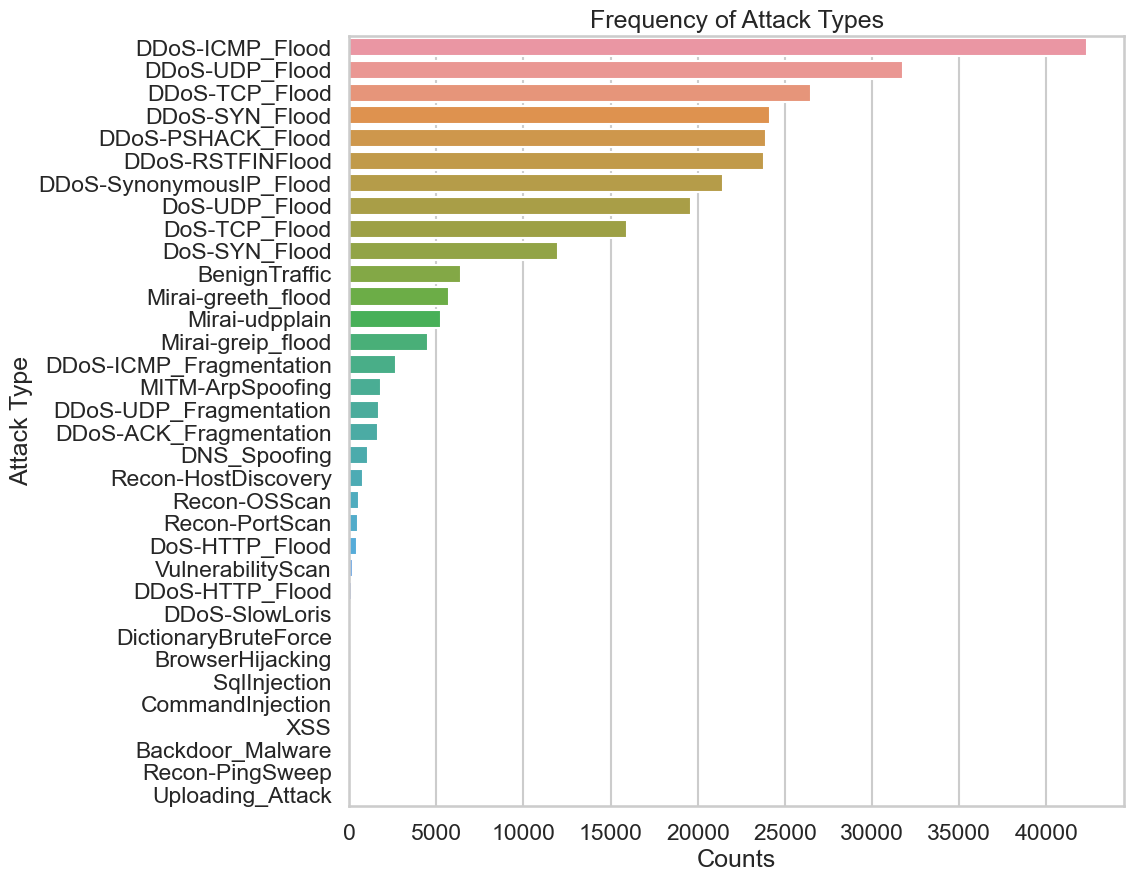

In [22]:
# 1.1 Data Label Analysis
attack_counts = df['label'].value_counts()
print(attack_counts)

# 1.2 Attack Characterization
attack_characteristics = df.groupby('label').mean()
print(attack_characteristics)

# 1.3 Impact Assessment (example using flow duration to quantify impact)
attack_impact = df.groupby('label')['flow_duration'].mean().sort_values(ascending=False)
print(attack_impact)

# Visualizing attack frequencies
plt.figure(figsize=(10, 10))
sns.barplot(y=attack_counts.index, x=attack_counts.values)
plt.title('Frequency of Attack Types')
plt.xlabel('Counts')
plt.ylabel('Attack Type')
plt.show()

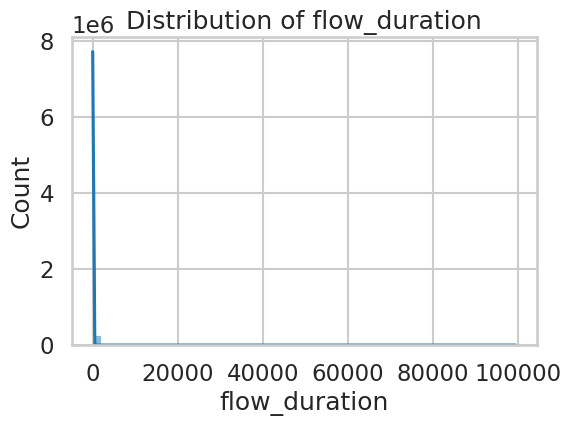

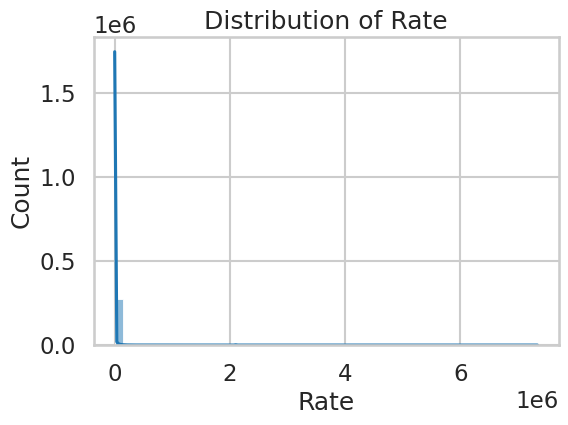

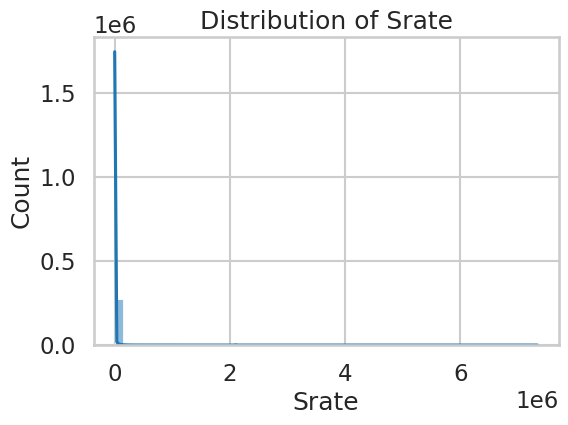

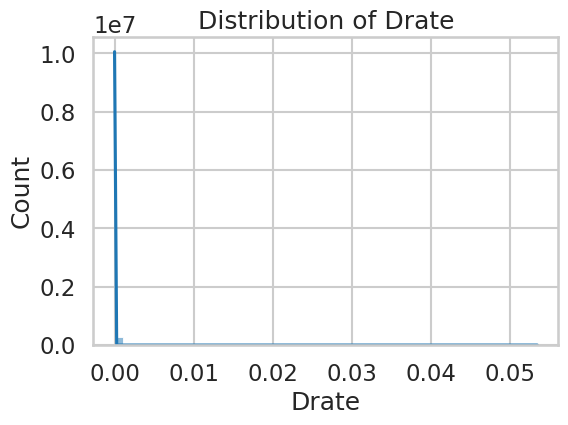

anomaly
 1    257457
-1     17801
Name: count, dtype: int64


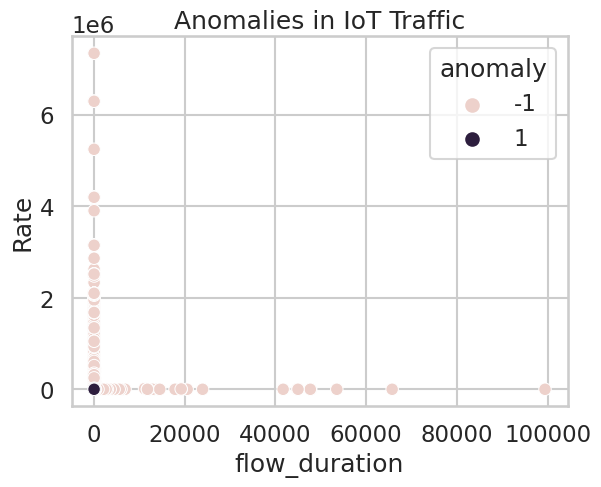

Protocol Type
6.00     130870
17.00     39575
1.00      35186
6.11       8742
5.94       7535
          ...  
5.73          1
2.55          1
11.08         1
9.61          1
14.71         1
Name: count, Length: 1819, dtype: int64


In [29]:
from sklearn.ensemble import IsolationForest

# 2.1 Traffic Flow Analysis
# Selecting relevant features for traffic flow analysis
traffic_features = df[['flow_duration', 'Rate', 'Srate', 'Drate']]

# Plotting distributions for traffic features
for feature in traffic_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# 2.2 Anomaly Detection
# Fitting the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
anomalies = iso_forest.fit_predict(traffic_features)
df['anomaly'] = anomalies

# Counting anomalies
anomaly_counts = pd.value_counts(df['anomaly'])
print(anomaly_counts)

# Visualizing the anomalies
sns.scatterplot(data=df, x='flow_duration', y='Rate', hue='anomaly')
plt.title('Anomalies in IoT Traffic')
plt.show()

# 2.3 Protocol Anomalies
protocol_usage = df['Protocol Type'].value_counts()
print(protocol_usage)


               flow_duration  Header_Length
Protocol Type                              
0.000000            0.000000       0.000000
0.500000            0.000000       0.000000
0.600000            9.652501    1131.100000
0.680000            0.000000       0.000000
0.860000            0.003981       2.220000
...                      ...            ...
46.589041           0.001276       1.972603
46.590000           0.021485      21.962890
46.677419           0.000000       1.150538
46.700000           0.013979      34.779858
47.000000           0.000000       0.000000

[1819 rows x 2 columns]


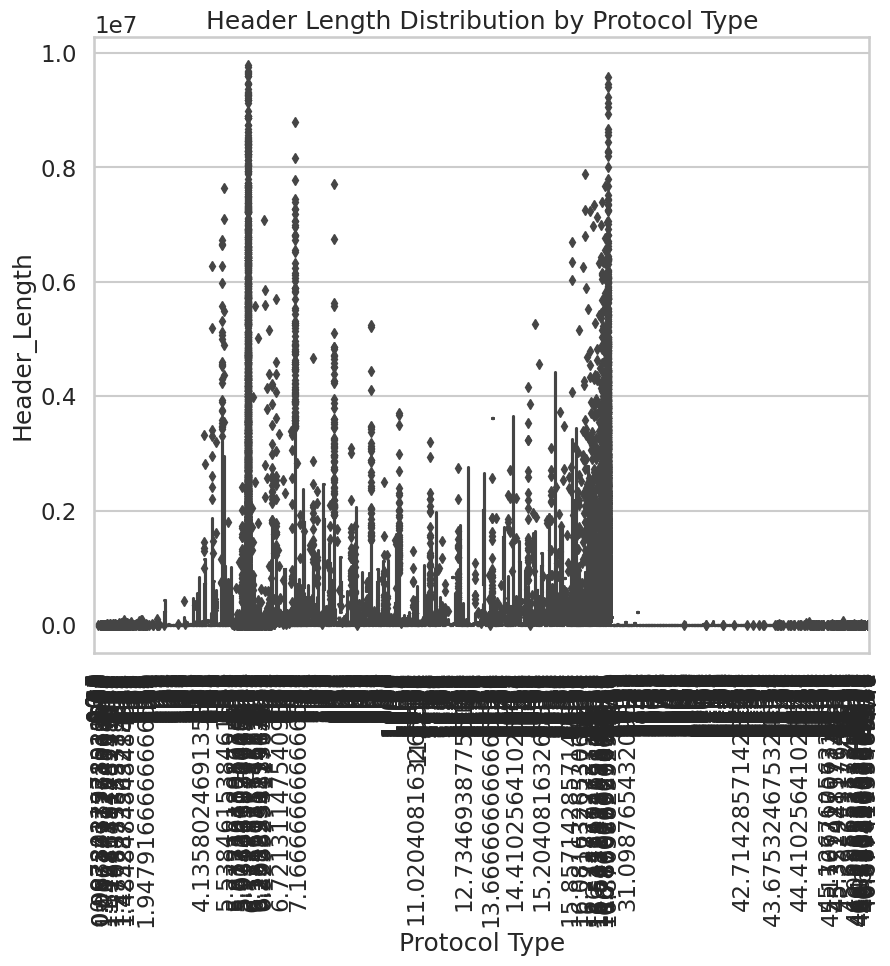

Protocol Type
17.0     7514
6.0      1952
16.89     754
7.1       598
16.84     579
         ... 
11.71       0
11.65       0
11.61       0
11.56       0
13.37       0
Name: count, Length: 1819, dtype: int64


In [30]:
# 3.1 Network Architecture Analysis
# Analyzing different protocols for vulnerabilities
protocol_analysis = df.groupby('Protocol Type').agg({'flow_duration': 'mean', 'Header_Length': 'mean'})
print(protocol_analysis)

# 3.2 Communication Protocol Analysis
# Ensure that 'Protocol Type' is treated as a categorical variable
df['Protocol Type'] = df['Protocol Type'].astype('category')

# Distribution of header lengths across different protocols
plt.figure(figsize=(10, 8))
sns.boxplot(x='Protocol Type', y='Header_Length', data=df)
plt.title('Header Length Distribution by Protocol Type')
plt.xticks(rotation=90)  # Rotate x labels for better readability if necessary
plt.show()


# 3.3 Vulnerability Identification
# Combining attack patterns with protocol usage to infer vulnerabilities
vulnerabilities = df[df['anomaly'] == -1]['Protocol Type'].value_counts()
print(vulnerabilities)


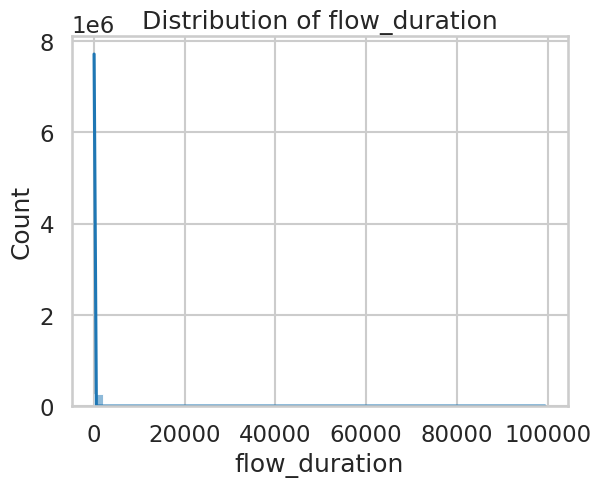

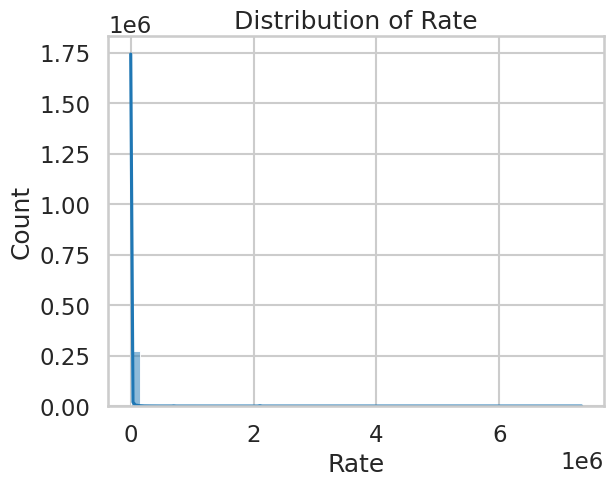

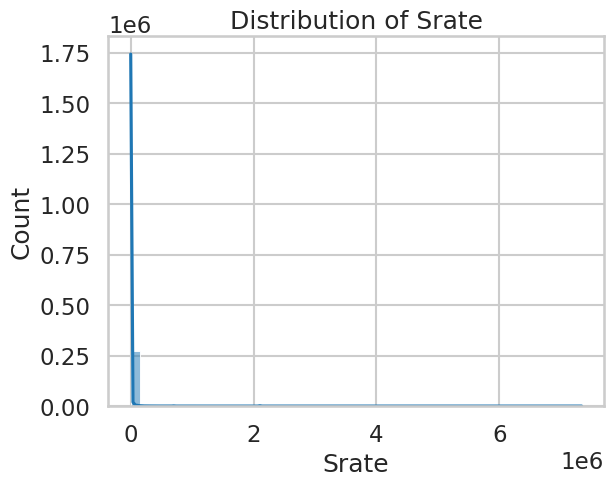

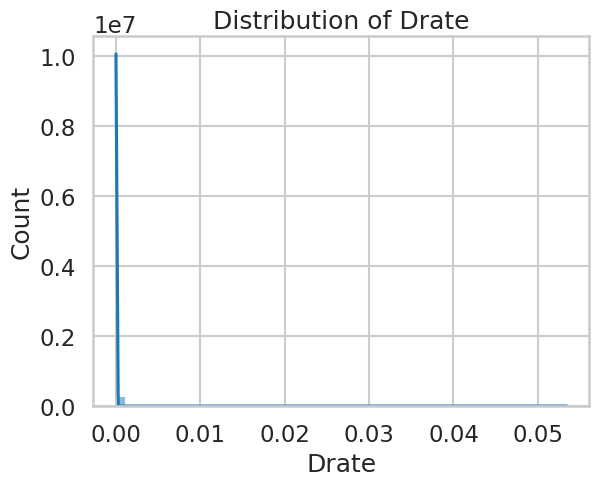

anomaly
 1    257457
-1     17801
Name: count, dtype: int64


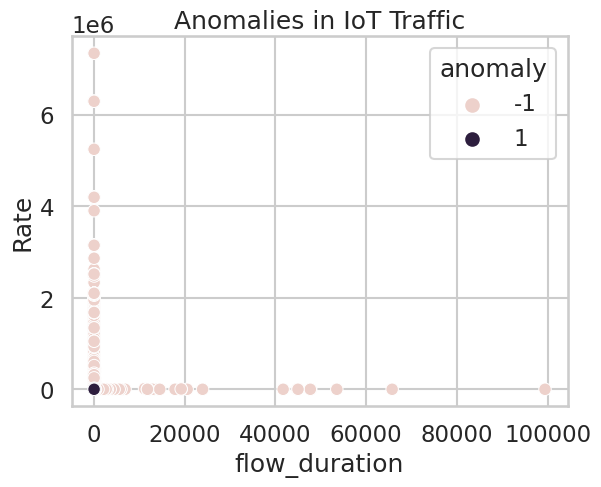

In [31]:
from sklearn.ensemble import IsolationForest
# Selecting relevant features for traffic flow analysis
traffic_features = df[['flow_duration', 'Rate', 'Srate', 'Drate']]

# Plotting distributions for traffic features
for feature in traffic_features.columns:
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Fitting the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
anomalies = iso_forest.fit_predict(traffic_features)
df['anomaly'] = anomalies

# Counting anomalies
anomaly_counts = pd.value_counts(df['anomaly'])
print(anomaly_counts)

# Visualizing the anomalies
# Ensure that 'df' is replaced with the actual DataFrame variable name, which is 'data' in this context
sns.scatterplot(data=df, x='flow_duration', y='Rate', hue='anomaly')
plt.title('Anomalies in IoT Traffic')
plt.show()

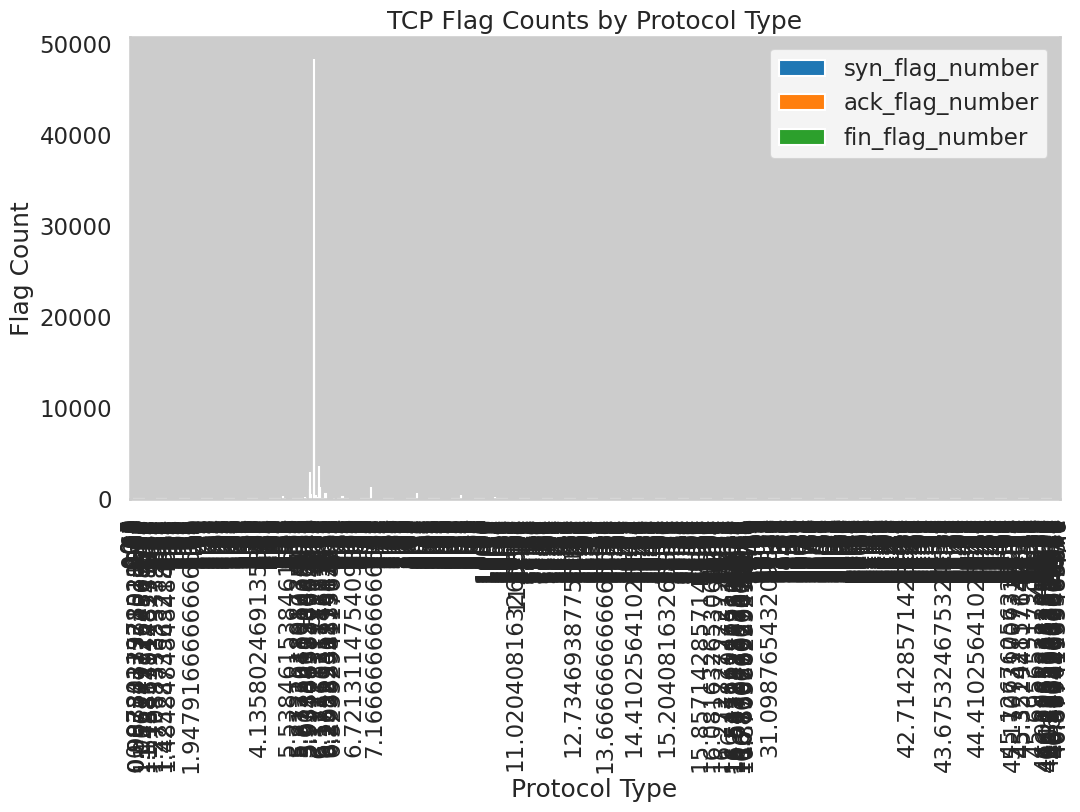

In [32]:
# Analyzing TCP flags by protocol type
tcp_flags = ['syn_flag_number', 'ack_flag_number', 'fin_flag_number']
protocol_flag_counts = df.groupby('Protocol Type')[tcp_flags].sum()

# Plotting the results
protocol_flag_counts.plot(kind='bar', figsize=(12, 6))
plt.title('TCP Flag Counts by Protocol Type')
plt.xlabel('Protocol Type')
plt.ylabel('Flag Count')
plt.show()


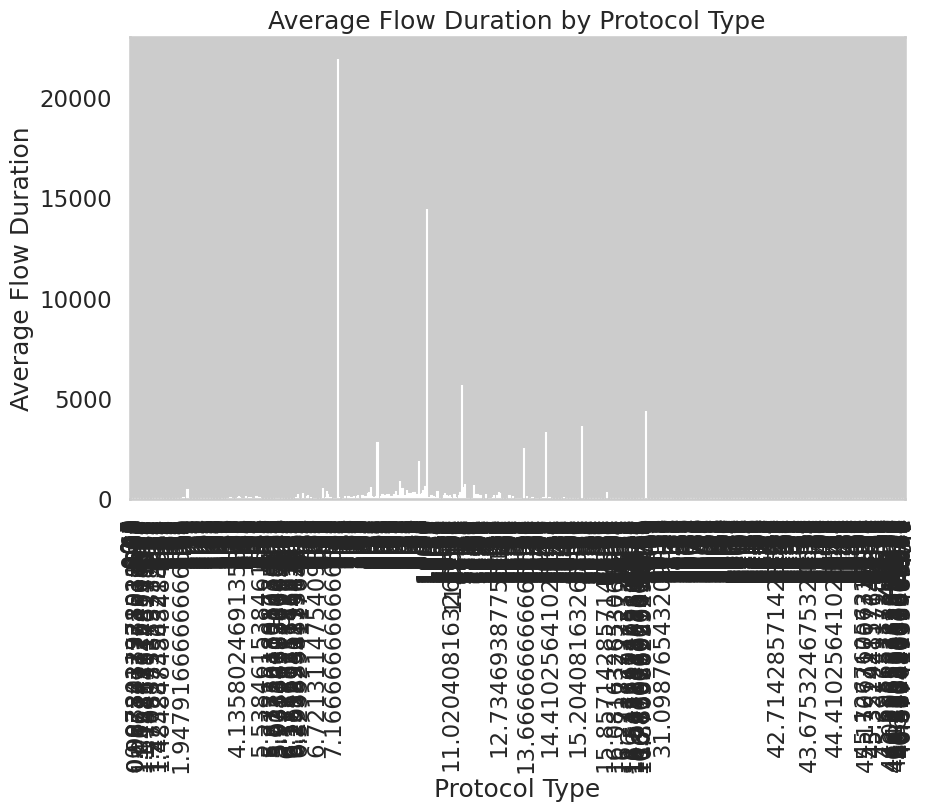

In [33]:
# Analyzing flow duration by protocol type
avg_flow_duration_by_protocol = df.groupby('Protocol Type')['flow_duration'].mean()

# Plotting the results
plt.figure(figsize=(10, 6))
avg_flow_duration_by_protocol.plot(kind='bar')
plt.title('Average Flow Duration by Protocol Type')
plt.xlabel('Protocol Type')
plt.ylabel('Average Flow Duration')
plt.show()


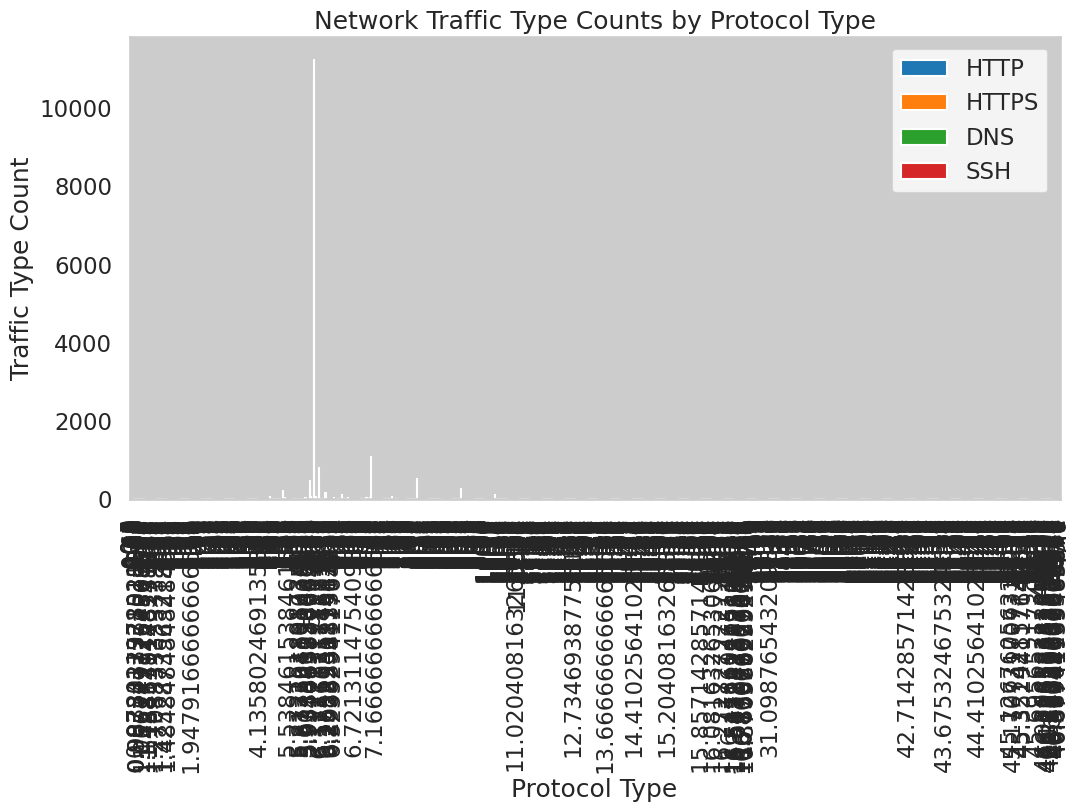

In [34]:
# Analyzing network traffic types by protocol type
traffic_types = ['HTTP', 'HTTPS', 'DNS', 'SSH']
protocol_traffic_counts = df.groupby('Protocol Type')[traffic_types].sum()

# Plotting the results
protocol_traffic_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Network Traffic Type Counts by Protocol Type')
plt.xlabel('Protocol Type')
plt.ylabel('Traffic Type Count')
plt.show()


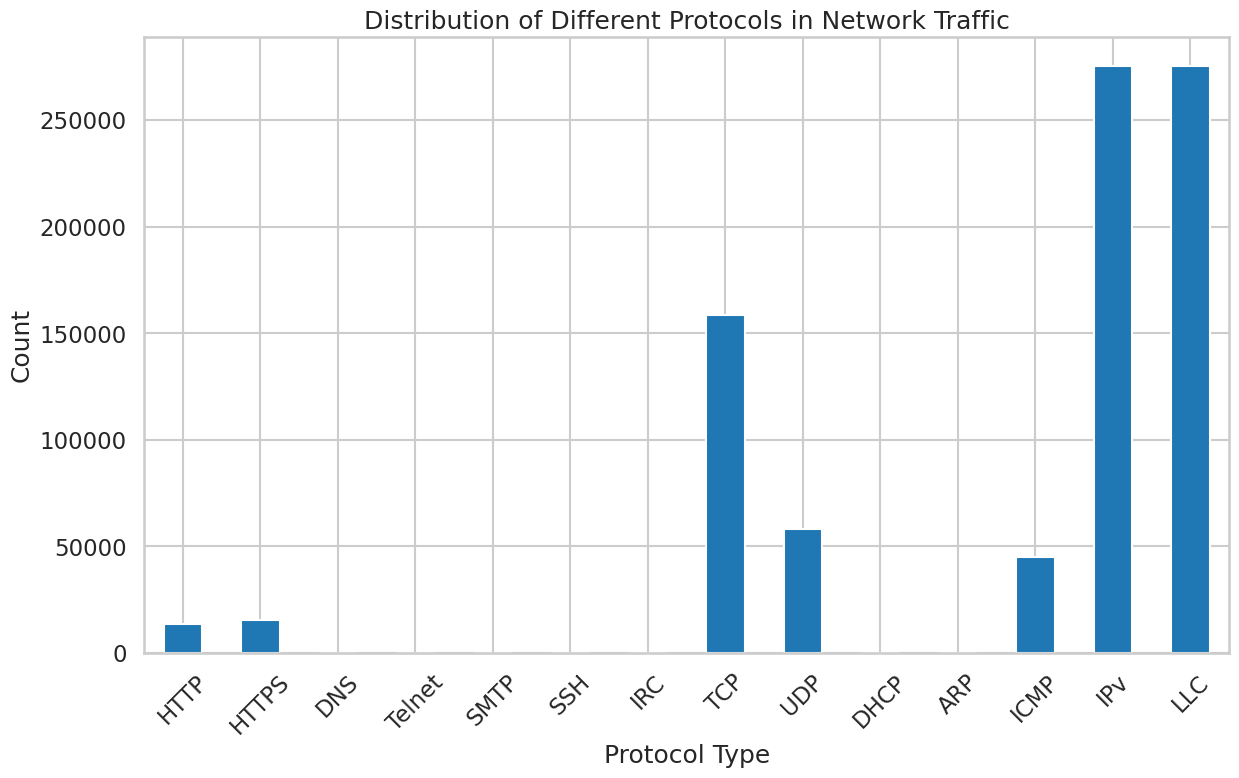

In [35]:

protocol_columns = ['HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 
                    'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC']

# Calculating the sum (or count) for each protocol
protocol_counts = df[protocol_columns].sum()

# Plotting the distribution of different protocols
plt.figure(figsize=(14, 8))
protocol_counts.plot(kind='bar')
plt.title('Distribution of Different Protocols in Network Traffic')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


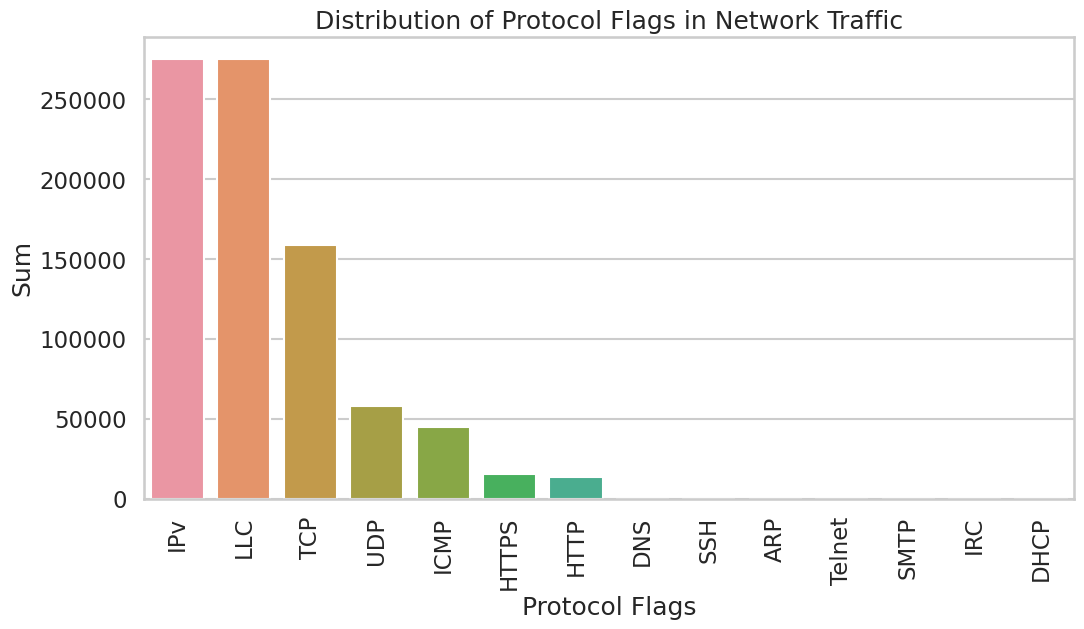

In [36]:
protocol_flags = ['HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC']

# Calculate the sum for each protocol flag to see their distribution
protocol_sum = df[protocol_flags].sum().sort_values(ascending=False)

# Plot the protocol distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=protocol_sum.index, y=protocol_sum.values)
plt.title('Distribution of Protocol Flags in Network Traffic')
plt.xlabel('Protocol Flags')
plt.ylabel('Sum')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [37]:
# Assuming HTTP traffic is indicated by a binary flag where 1 means HTTP traffic is present
http_flows = df[df['HTTP'] == 1]  # Filter flows where HTTP traffic is present

# Calculate the average flow duration for HTTP traffic
avg_http_flow_duration = http_flows['flow_duration'].mean()

print(f'Average Flow Duration for HTTP Traffic: {avg_http_flow_duration}')



Average Flow Duration for HTTP Traffic: 1.382439134943622


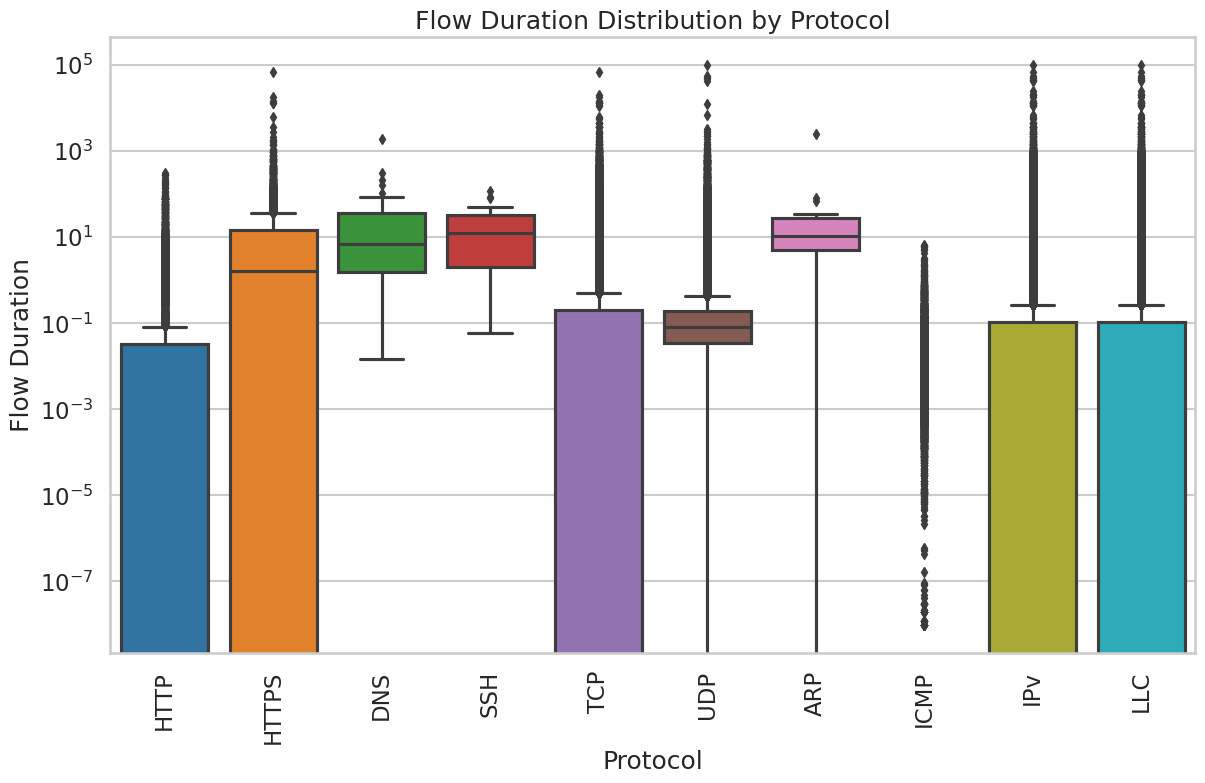

In [38]:
# Melting the DataFrame to have protocol flags as a single categorical variable
melted_df = df.melt(id_vars=['flow_duration'], value_vars=protocol_flags, var_name='Protocol', value_name='Flag')

# Filter out only the rows where the protocol flag is present (i.e., Flag == 1)
melted_df = melted_df[melted_df['Flag'] == 1]

# Plotting the flow duration distribution for different protocols
plt.figure(figsize=(14, 8))
sns.boxplot(x='Protocol', y='flow_duration', data=melted_df)
plt.title('Flow Duration Distribution by Protocol')
plt.xlabel('Protocol')
plt.ylabel('Flow Duration')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yscale('log')  # Using a log scale due to wide range of durations
plt.show()


In [39]:
print(df.columns)

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label',
       'anomaly'],
      dtype='object')


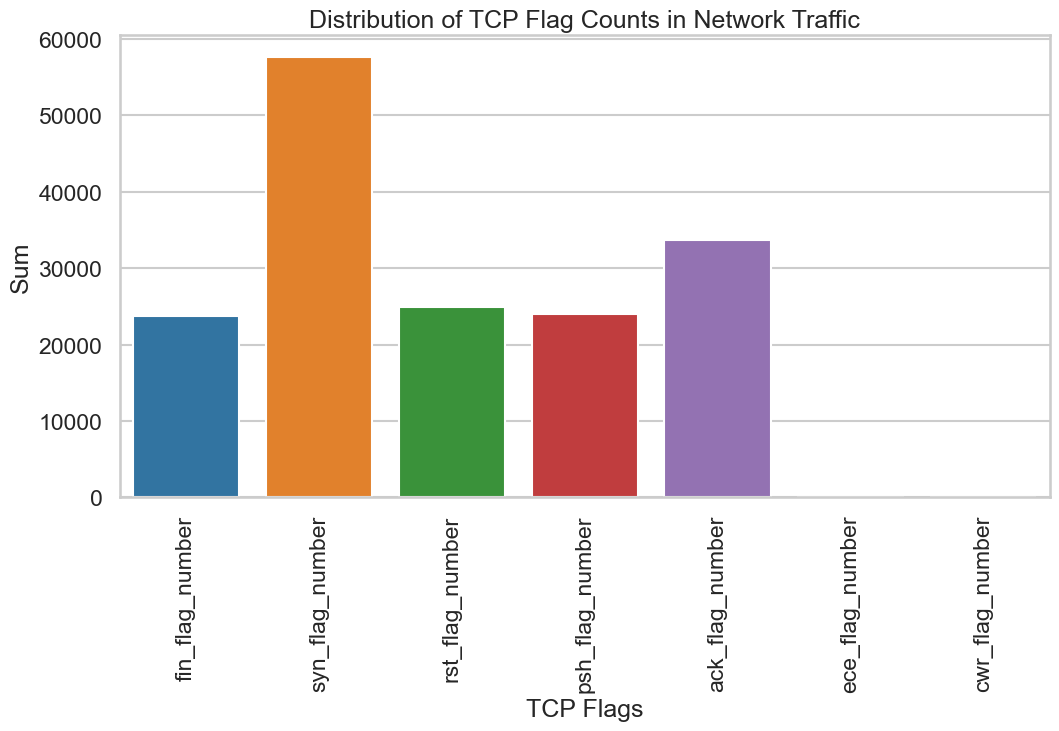

In [23]:
# List of corrected TCP flag columns based on DataFrame
flag_columns = [
    'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
    'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number'
]

# Calculate the sum for each flag column to see their distribution
flag_sum = df[flag_columns].sum()

# Plot the flag distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=flag_sum.index, y=flag_sum.values)
plt.title('Distribution of TCP Flag Counts in Network Traffic')
plt.xlabel('TCP Flags')
plt.xticks(rotation=90)
plt.ylabel('Sum')
plt.show()


From the "Distribution of TCP Flag Counts in Network Traffic" plot, it looks like the ack_flag_number is the most prevalent, followed by syn_flag_number and fin_flag_number. This distribution is typical as ACK and SYN flags are commonly used in the establishment and acknowledgment of TCP connections.


The high count of certain flags might warrant a closer look to see if they correlate with specific types of attacks or benign traffic patterns.

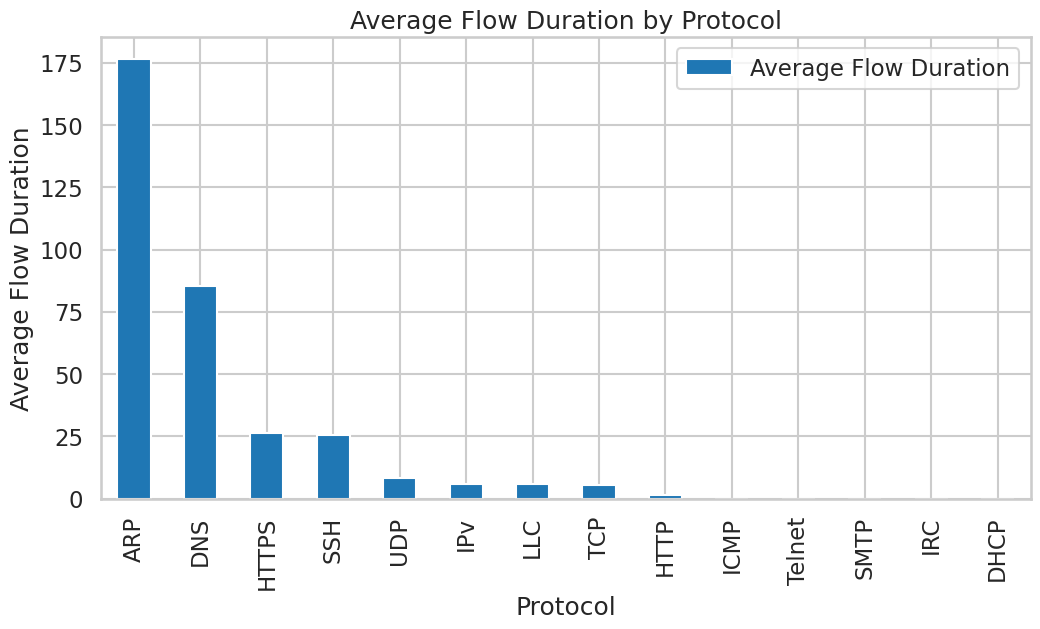

In [41]:
# For the flow duration analysis, we'll use the binary protocol columns
protocol_flags = ['HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC']

# Calculate the average flow duration for when each protocol is present
avg_flow_duration_by_protocol = {protocol: df[df[protocol] == 1]['flow_duration'].mean() for protocol in protocol_flags}

# Convert the dictionary to a DataFrame for easy plotting
avg_flow_duration_df = pd.DataFrame.from_dict(avg_flow_duration_by_protocol, orient='index', columns=['Average Flow Duration'])

# Plot the average flow duration for each protocol
avg_flow_duration_df.sort_values('Average Flow Duration', ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Average Flow Duration by Protocol')
plt.xlabel('Protocol')
plt.ylabel('Average Flow Duration')
plt.show()


The "Average Flow Duration by Protocol" plot indicates ARP traffic has the highest average flow duration, followed by DNS traffic. This could suggest that ARP and DNS flows tend to have longer durations within the dataset. The longer flow durations for ARP might be due to ARP spoofing or poisoning attacks, which are common in IoT environments, while DNS could be related to DNS tunneling or reconnaissance activities.

Longer flow durations for protocols like ARP and DNS might suggest unusual network behavior, potentially indicative of malicious activity.

Network security professionals can prioritize which protocols to scrutinize for vulnerabilities or anomalous behavior. If ARP and DNS are showing unusual patterns, they might need more robust security measures or monitoring strategies.

In [42]:
attack_counts = df['label'].value_counts()


In [43]:
# Count the frequency of each attack type
attack_type_counts = df['label'].value_counts().reset_index()
attack_type_counts.columns = ['Attack Type', 'Frequency']

# Export this data to a CSV file for Tableau
attack_type_counts.to_csv('attack_type_counts.csv', index=False)

# Ccalculate the average impact of each attack type
# For example, using flow_duration as a proxy for impact
attack_impact = df.groupby('label')['flow_duration'].mean().reset_index()
attack_impact.columns = ['Attack Type', 'Average Impact']

# Export impact data to CSV
attack_impact.to_csv('attack_impact.csv', index=False)

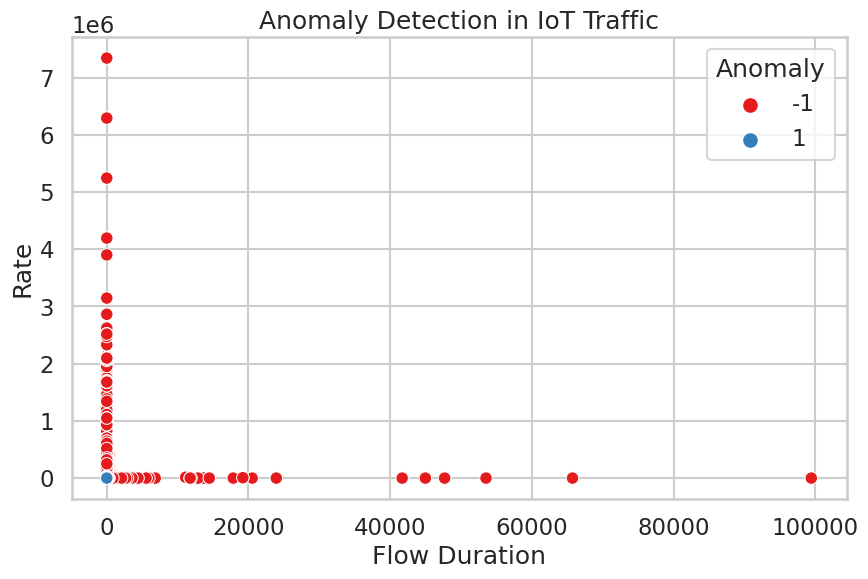

In [44]:
features = df[['flow_duration', 'Rate', 'Srate', 'Drate']]
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
df['anomaly'] = iso_forest.fit_predict(features)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='flow_duration', y='Rate', hue='anomaly', palette='Set1')
plt.title('Anomaly Detection in IoT Traffic')
plt.xlabel('Flow Duration')
plt.ylabel('Rate')
plt.legend(title='Anomaly')
plt.show()

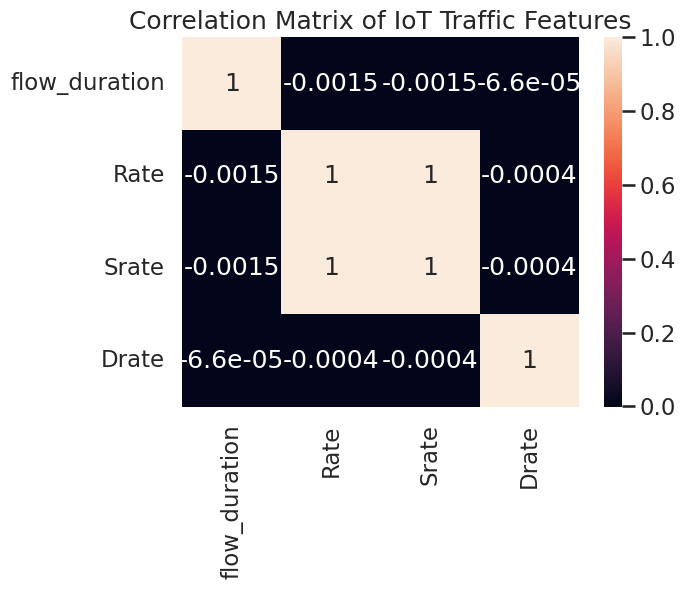

In [45]:
#Correlation Analysis
correlation_matrix = df[['flow_duration', 'Rate', 'Srate', 'Drate']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of IoT Traffic Features')
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


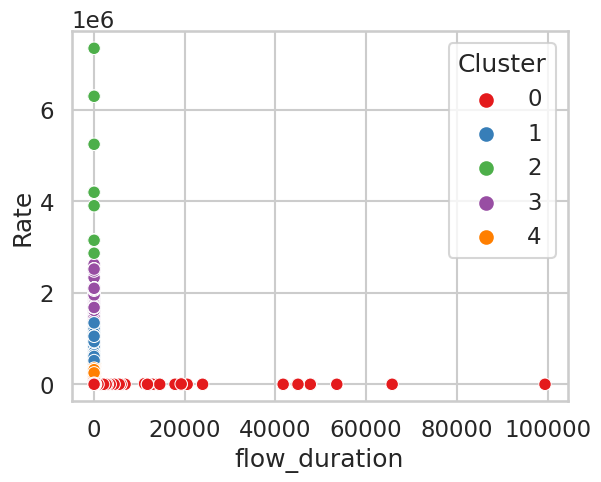

In [46]:
#Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(features)
sns.scatterplot(data=df, x='flow_duration', y='Rate', hue='cluster', palette='Set1')
plt.legend(title='Cluster')
plt.show()


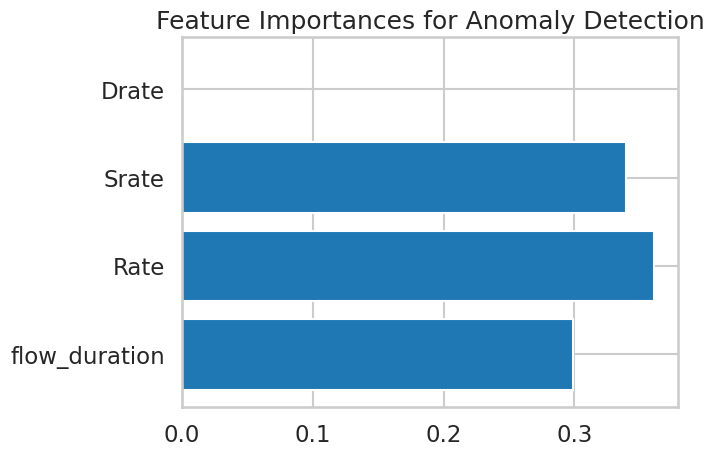

In [47]:
#Feature Importance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(features, df['anomaly'])
importances = rf.feature_importances_
plt.barh(features.columns, importances)
plt.title('Feature Importances for Anomaly Detection')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


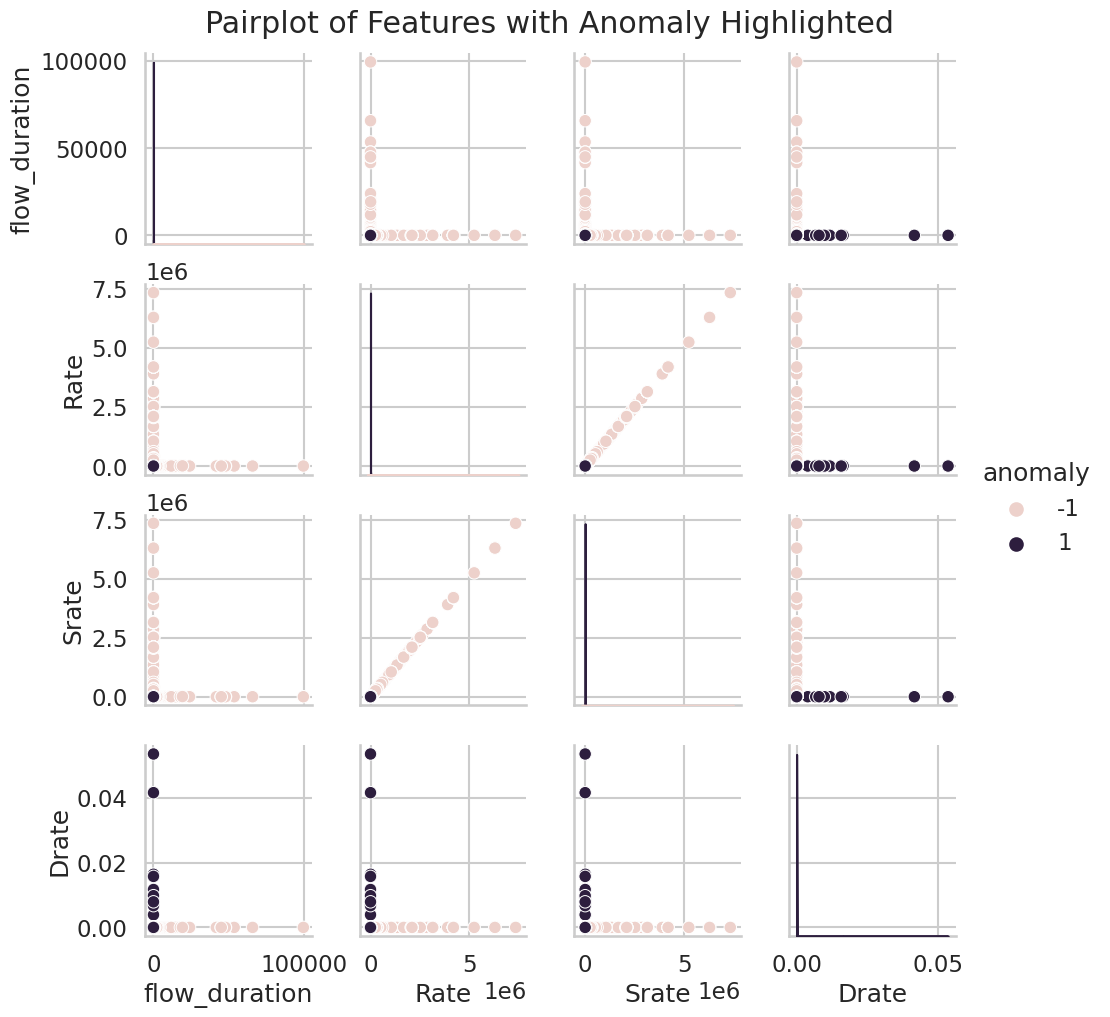

In [48]:
#Multivariate Analysis
pairplot = sns.pairplot(df[['flow_duration', 'Rate', 'Srate', 'Drate', 'anomaly']], hue='anomaly')
pairplot.fig.suptitle('Pairplot of Features with Anomaly Highlighted', y=1.02)
plt.show()


In [ ]:
print(df_corr["label"].sort_values(ascending=False, key=abs).to_markdown())

|                 |        label |
|:----------------|-------------:|
| label           |  1           |
| Protocol Type   |  0.45861     |
| Min             |  0.405704    |
| Magnitue        |  0.301441    |
| AVG             |  0.226213    |
| Tot size        |  0.225437    |
| Tot sum         |  0.222546    |
| UDP             |  0.170722    |
| ICMP            | -0.16666     |
| TCP             | -0.166117    |
| Header_Length   |  0.162468    |
| ack_flag_number | -0.126027    |
| fin_flag_number | -0.116865    |
| ack_count       | -0.110791    |
| psh_flag_number | -0.104059    |
| rst_flag_number | -0.103016    |
| urg_count       |  0.0920605   |
| HTTPS           | -0.0831803   |
| fin_count       | -0.0755288   |
| syn_count       | -0.0637364   |
| Max             |  0.0589227   |
| syn_flag_number | -0.0528001   |
| Variance        |  0.04683     |
| flow_duration   |  0.0457839   |
| Duration        | -0.0445295   |
| Std             | -0.0440355   |
| Radius          | 

In [49]:
#Protocol Behavior Analysis

protocols = ['HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC']

protocol_anomaly_rates = {}

for protocol in protocols:

    anomaly_column = protocol + '_anomaly'
    df[anomaly_column] = df.apply(lambda x: 1 if x[protocol] > 0 and x['anomaly'] == -1 else 0, axis=1)
    

    protocol_anomaly_rates[protocol] = df[anomaly_column].mean()


protocol_anomaly_rates_df = pd.DataFrame(list(protocol_anomaly_rates.items()), columns=['Protocol', 'Anomaly Rate'])


protocol_anomaly_rates_df.sort_values('Anomaly Rate', ascending=False, inplace=True)


protocol_anomaly_rates_df


Protocol  Anomaly Rate
12      IPv      0.064630
13      LLC      0.064630
8       UDP      0.042208
7       TCP      0.016977
1     HTTPS      0.008872
11     ICMP      0.002002
0      HTTP      0.000777
2       DNS      0.000040
5       SSH      0.000015
10      ARP      0.000011
3    Telnet      0.000000
4      SMTP      0.000000
6       IRC      0.000000
9      DHCP      0.000000

In [50]:
# Get a quick overview of the dataset
print(df.info())
print(df.head())
print(df.describe())

# If 'Protocol Type' contains unclear integer values, explore its unique values
print(df['Protocol Type'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275258 entries, 0 to 275257
Data columns (total 63 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   flow_duration    275258 non-null  float64 
 1   Header_Length    275258 non-null  float64 
 2   Protocol Type    275258 non-null  category
 3   Duration         275258 non-null  float64 
 4   Rate             275258 non-null  float64 
 5   Srate            275258 non-null  float64 
 6   Drate            275258 non-null  float64 
 7   fin_flag_number  275258 non-null  float64 
 8   syn_flag_number  275258 non-null  float64 
 9   rst_flag_number  275258 non-null  float64 
 10  psh_flag_number  275258 non-null  float64 
 11  ack_flag_number  275258 non-null  float64 
 12  ece_flag_number  275258 non-null  float64 
 13  cwr_flag_number  275258 non-null  float64 
 14  ack_count        275258 non-null  float64 
 15  syn_count        275258 non-null  float64 
 16  fin_count        275

In [51]:
protocol_types = df['Protocol Type'].unique()

# Checking the 'label' column for understanding the classification of data
labels = df['label'].unique()

(protocol_types, labels)

([46.53, 1.00, 17.00, 6.00, 1.05, ..., 9.33, 9.63, 41.90, 14.47, 14.71]
 Length: 1819
 Categories (1819, float64): [0.00, 0.50, 0.60, 0.68, ..., 46.590000, 46.677419, 46.700000, 47.000000],
 array(['Mirai-greeth_flood', 'DDoS-ICMP_Flood', 'DDoS-UDP_Flood',
        'DoS-SYN_Flood', 'DoS-UDP_Flood', 'DDoS-RSTFINFlood',
        'DDoS-TCP_Flood', 'Recon-OSScan', 'DDoS-SYN_Flood',
        'Mirai-greip_flood', 'DDoS-PSHACK_Flood',
        'DDoS-SynonymousIP_Flood', 'Mirai-udpplain', 'DoS-TCP_Flood',
        'MITM-ArpSpoofing', 'DNS_Spoofing', 'BenignTraffic',
        'Recon-PortScan', 'DDoS-ICMP_Fragmentation',
        'DDoS-ACK_Fragmentation', 'DDoS-UDP_Fragmentation',
        'Recon-HostDiscovery', 'DDoS-SlowLoris', 'DoS-HTTP_Flood',
        'VulnerabilityScan', 'DDoS-HTTP_Flood', 'XSS',
        'DictionaryBruteForce', 'Backdoor_Malware', 'CommandInjection',
        'SqlInjection', 'BrowserHijacking', 'Uploading_Attack',
        'Recon-PingSweep'], dtype=object))

In [52]:
# Sum of each flag type
flags_sum = df[['fin_flag_number', 'syn_flag_number','rst_flag_number', 'psh_flag_number', 'ack_flag_number','ece_flag_number', 'cwr_flag_number']].sum()

# Average flow duration for each type of attack
avg_flow_duration = df.groupby('label')['flow_duration'].mean()

# Rate and count of different protocols
protocol_rates = df[['HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC']].mean()
protocol_counts = df[['HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC']].sum()


flags_sum, avg_flow_duration, protocol_rates, protocol_counts

(fin_flag_number    23812.0
 syn_flag_number    57586.0
 rst_flag_number    24889.0
 psh_flag_number    23950.0
 ack_flag_number    33707.0
 ece_flag_number        0.0
 cwr_flag_number        0.0
 dtype: float64,
 label
 Backdoor_Malware            683.629377
 BenignTraffic                39.068528
 BrowserHijacking            100.469874
 CommandInjection             95.565194
 DDoS-ACK_Fragmentation        0.285059
 DDoS-HTTP_Flood               7.964722
 DDoS-ICMP_Flood               1.583759
 DDoS-ICMP_Fragmentation       0.549666
 DDoS-PSHACK_Flood             0.102110
 DDoS-RSTFINFlood              0.073475
 DDoS-SYN_Flood                0.153319
 DDoS-SlowLoris               23.770522
 DDoS-SynonymousIP_Flood       1.996461
 DDoS-TCP_Flood                0.083871
 DDoS-UDP_Flood                0.400385
 DDoS-UDP_Fragmentation        1.694531
 DNS_Spoofing                394.800811
 DictionaryBruteForce       1252.469989
 DoS-HTTP_Flood                6.883695
 DoS-SYN_Flood      

In [25]:
# Calculate the sum of each TCP flag type
flags_sum = df[
    ['fin_flag_number', 'syn_flag_number', 'rst_flag_number',
     'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 
     'cwr_flag_number']
].sum()

# Sort the flag sums for better visualization
flags_sum_sorted = flags_sum.sort_values(ascending=False)

print(flags_sum_sorted)


syn_flag_number    57586.0
ack_flag_number    33707.0
rst_flag_number    24889.0
psh_flag_number    23950.0
fin_flag_number    23812.0
ece_flag_number        0.0
cwr_flag_number        0.0
dtype: float64


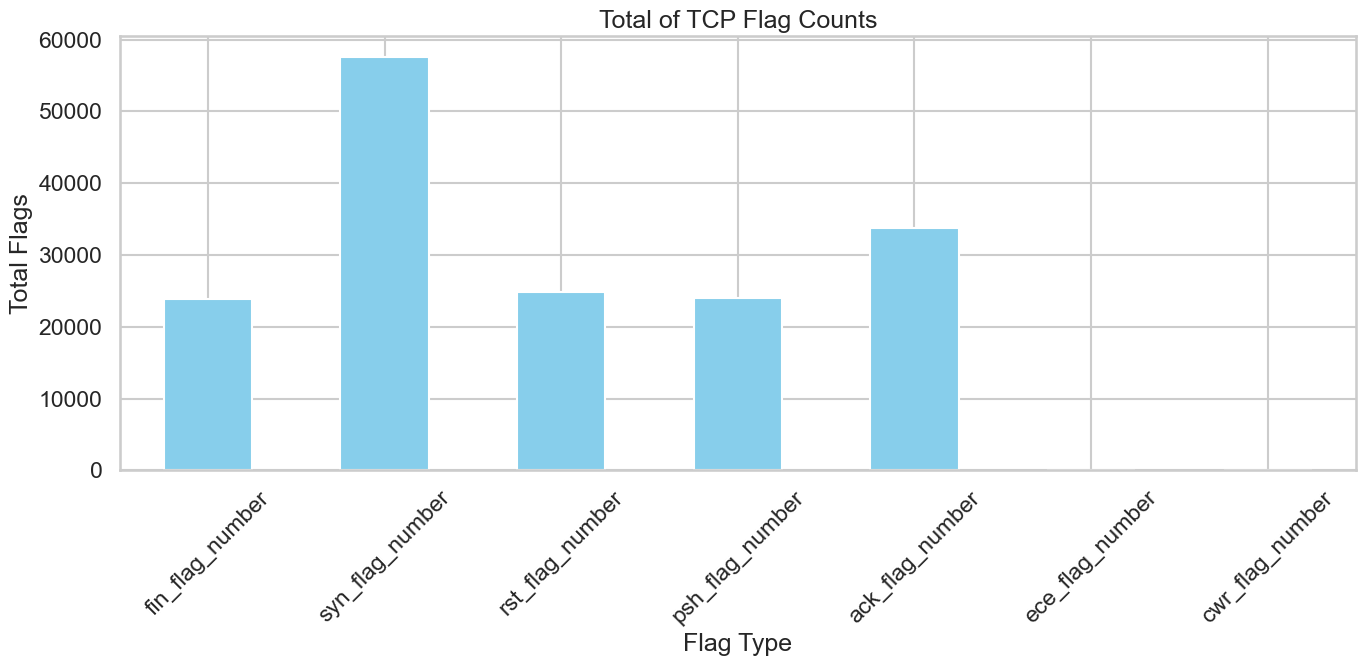

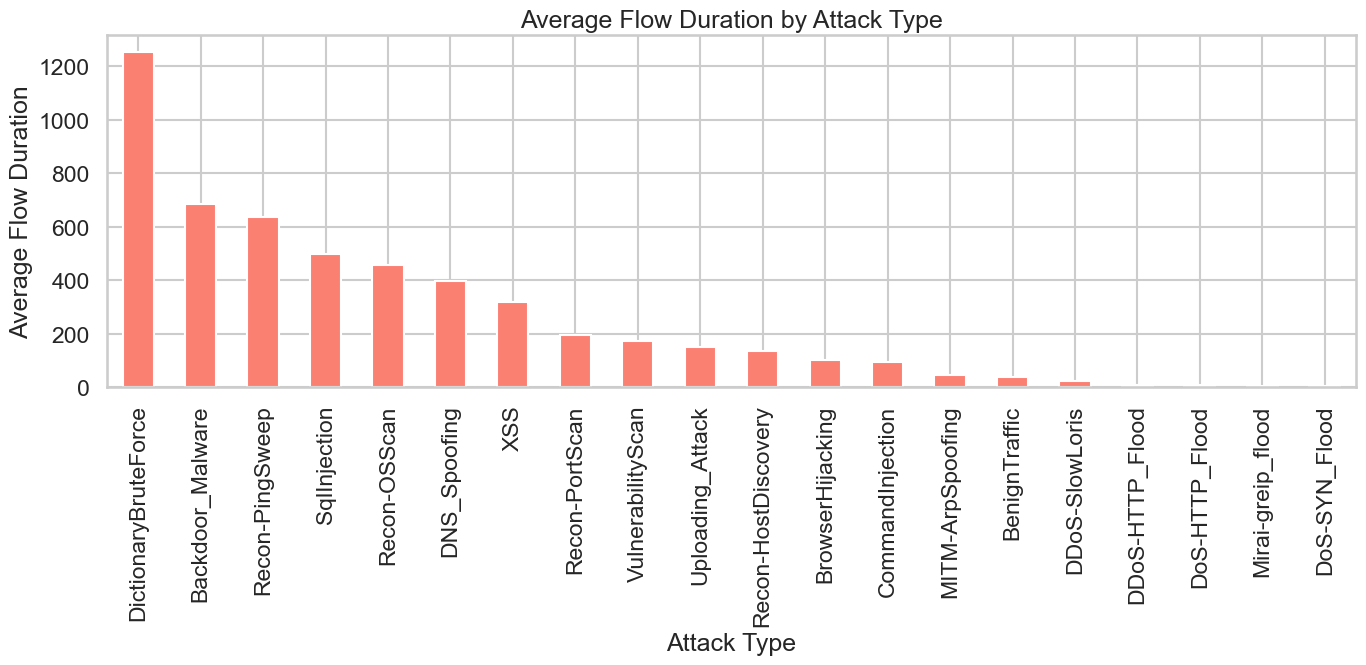

NameError: name 'protocol_rates' is not defined

<Figure size 1400x700 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot for TCP Flags Analysis
plt.figure(figsize=(14, 7))
flags_sum.plot(kind='bar', color='skyblue')
plt.title('Total of TCP Flag Counts')
plt.ylabel('Total Flags')
plt.xlabel('Flag Type')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

# Plot for Average Flow Duration by Attack Type
# We sort the values for better visualization and take the top 20 attack types for a cleaner plot
top_attack_types = df.groupby('label')['flow_duration'].mean().sort_values(ascending=False)[:20]
plt.figure(figsize=(14, 7))
top_attack_types.plot(kind='bar', color='salmon')
plt.title('Average Flow Duration by Attack Type')
plt.ylabel('Average Flow Duration')
plt.xlabel('Attack Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot for Protocol Rates
plt.figure(figsize=(14, 7))
protocol_rates.plot(kind='bar', color='lightgreen')
plt.title('Average Rate by Protocol')
plt.ylabel('Average Rate')
plt.xlabel('Protocol')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for Protocol Counts
plt.figure(figsize=(14, 7))
protocol_counts.plot(kind='bar', color='orchid')
plt.title('Total Counts by Protocol')
plt.ylabel('Total Counts')
plt.xlabel('Protocol')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
